#  Inicialización del entorno

**Empezamos cargando algunas herramientas para cargar los datos, manipularlos y visualizarlos.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import metrics
import numpy as np 
import missingno as msno
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import max_error
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor


# Exploración de la base

### Exportamos los datos

In [2]:
# Importamos los datos. 
# Hoja 1
df1 = pd.read_excel('Dataset_Inmuebles.xlsx',sheet_name='Inputs_1') 
# Hoja 2
df2 = pd.read_excel('Dataset_Inmuebles.xlsx',sheet_name='Inputs_2') 
# Hoja 3
df3 = pd.read_excel('Dataset_Inmuebles.xlsx',sheet_name='Inputs_3') 

In [3]:
# Dataset final
df_1 = pd.merge(df1, df2, how='outer', left_on='ID', right_on='ID')

In [4]:
propiedades_caba = pd.merge(df_1, df3, how='outer', left_on='ID', right_on='ID')

In [5]:
# Consultamos la cantidad de filas y columnas del dataset final
propiedades_caba.shape

(10567, 14)

In [6]:
# Exploramos las 5 primeras filas
propiedades_caba.head()

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100.0k,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350.0k,111,104,NaN,4,5000.0,PALERMO,14
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93.5k,32,32,NaN,2,NaN,PALERMO,14
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,3 AMBIENTES. CONTRAFRENTE. 55 M2. IMPECABLE. V...,DEPARTAMENTO EN VENTA.|.APARTMENT,140.0k,55,55,3.0,3,1733.0,ALMAGRO,5
4,946,apartment,-34.573.452,-584.615.581,"LIVING/COMEDOR, TOILETTE, 3 DORMITORIOS (SUITE...",VENTA: Importante piso muy alto en torre de ca...,690.0k,185,185,NaN,4,NaN,BELGRANO,13


### Análisis exploratorio

In [7]:
# Consultamos las columnas del dataset
propiedades_caba.columns

Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'barrio', 'comuna'],
      dtype='object')

**VARIABLES DEL DATASET:**
- ID: Número identificador del inmueble                   
- property_type: tipo de propiedad (apartment, house)       
- lat: latitud                 
- lon: longitud                
- description: datos descriptivos de la propiedad         
- title: información sobre la publicación de venta              
- price_usd: precio de venta en dólares estadounidenses           
- surface_total: superficie total de la propiedad       
- surface_covered: superficie cubierta de la propiedad      
- floor: piso en que se ubica, en caso de corresponder              
- rooms: cantidad de dormitorios                
- expenses: precio de las expensas           
- barrio: barrio en que se encuentra ubicada la propiedad              
- comuna: comuna en que se encuentra la porpiedad               


In [8]:
propiedades_caba.dtypes

ID                   int64
property_type       object
lat                 object
lon                 object
description         object
title               object
price_usd           object
surface_total        int64
surface_covered      int64
floor              float64
rooms                int64
expenses           float64
barrio              object
comuna               int64
dtype: object

In [9]:
propiedades_caba.describe()

,ID,surface_total,surface_covered,floor,rooms,expenses,comuna
count,10567.000000,10567.000000,10567.000000,1717.000000,10567.000000,2535.000000,10567.000000
mean,5283.000000,134.342103,114.104192,11.588235,3.022618,4988.811834,8.272925
std,3050.574481,1821.969121,1483.252298,59.039495,1.674473,5248.746456,5.132624
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2641.500000,48.000000,43.000000,2.000000,2.000000,2000.000000,3.000000
50%,5283.000000,74.000000,66.000000,4.000000,3.000000,3200.000000,9.000000
75%,7924.500000,126.000000,112.000000,8.000000,4.000000,5800.000000,13.000000
max,10566.000000,184000.000000,150000.000000,904.000000,30.000000,40000.000000,15.000000


In [10]:
propiedades_caba.price_usd.unique()

array(['100.0k', '350.0k', '93.5k', ..., '122.923k', '126.95k', '112.9k'],
      dtype=object)

In [11]:
# Eliminamos la k de la columna price_uds
propiedades_caba['price_usd'] = propiedades_caba['price_usd'].replace({'k': ''}, regex=True)

In [12]:
propiedades_caba.price_usd.unique()

array(['100.0', '350.0', '93.5', ..., '122.923', '126.95', '112.9'],
      dtype=object)

In [13]:
propiedades_caba.price_usd.unique()

array(['100.0', '350.0', '93.5', ..., '122.923', '126.95', '112.9'],
      dtype=object)

In [14]:
# cambiamos el tipo de datos de proce_uds para poder manipularla
propiedades_caba['price_usd'] = propiedades_caba.price_usd.astype('float64')

In [15]:
# verificamos que se haya modificado el tipo de datos
propiedades_caba['price_usd'].dtypes

dtype('float64')

In [16]:
propiedades_caba['price_usd'].describe().round(2)

count    10567.00
mean       304.33
std        371.27
min          5.04
25%        124.00
50%        189.00
75%        340.00
max      11111.11
Name: price_usd, dtype: float64

In [17]:
# Multiplicamos por 1000 los precios, para expresar el valor real
propiedades_caba['price_usd'] = (1000*propiedades_caba['price_usd'])

In [18]:
# Convertimos a número entero el valor de price_usd
propiedades_caba['price_usd'] = propiedades_caba['price_usd'].astype(int)

In [19]:
propiedades_caba.head(10)

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100000,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350000,111,104,NaN,4,5000.0,PALERMO,14
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93500,32,32,NaN,2,NaN,PALERMO,14
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,3 AMBIENTES. CONTRAFRENTE. 55 M2. IMPECABLE. V...,DEPARTAMENTO EN VENTA.|.APARTMENT,140000,55,55,3.0,3,1733.0,ALMAGRO,5
4,946,apartment,-34.573.452,-584.615.581,"LIVING/COMEDOR, TOILETTE, 3 DORMITORIOS (SUITE...",VENTA: Importante piso muy alto en torre de ca...,690000,185,185,NaN,4,NaN,BELGRANO,13
5,145,apartment,-346.173.096,-583.785.392,"Departamento de 2 ambientes amplios, lateral c...",Departamento de 2 ambientes y 1/2 en venta.|.A...,87000,48,48,NaN,2,NaN,MONSERRAT,1
6,5114,apartment,-346.162.066.958,-583.614.898.429,"Excelente 4 ambientes, que se modifico a 3 amb...",Terrazas de Puerto Madero.|.APARTMENT,475000,91,81,NaN,3,NaN,PUERTO MADERO,1
7,8301,apartment,-346.240.189,-58.444.964,"Frente muy luminoso. Con balconLiving comedor,...",Venta - 3 Ambientes - Caballito.|.APARTMENT,186000,66,61,NaN,3,NaN,CABALLITO,6
8,3937,apartment,-34.590.371.000.000.000,-583.908.326,Lindisimo departamento en edificio de buenisim...,Departamento de 2 dormitorios en buen estado e...,360000,100,100,NaN,4,NaN,RECOLETA,2
9,7232,apartment,-346.033.361,-583.723.282,EL DEPARTAMENTO SE VENDE AMOBLADO Y CON TODO I...,Av. Corrientes 400 San Nicolas 2 Ambientes APT...,160000,43,40,NaN,2,NaN,SAN NICOLAS,1


In [20]:
propiedades_caba.dtypes

ID                   int64
property_type       object
lat                 object
lon                 object
description         object
title               object
price_usd            int64
surface_total        int64
surface_covered      int64
floor              float64
rooms                int64
expenses           float64
barrio              object
comuna               int64
dtype: object

In [21]:
propiedades_caba.describe().round(2)

,ID,price_usd,surface_total,surface_covered,floor,rooms,expenses,comuna
count,10567.00,10567.00,10567.00,10567.00,1717.00,10567.00,2535.00,10567.00
mean,5283.00,304326.24,134.34,114.10,11.59,3.02,4988.81,8.27
std,3050.57,371265.81,1821.97,1483.25,59.04,1.67,5248.75,5.13
min,0.00,5043.00,1.00,1.00,1.00,1.00,1.00,1.00
25%,2641.50,124000.00,48.00,43.00,2.00,2.00,2000.00,3.00
50%,5283.00,189000.00,74.00,66.00,4.00,3.00,3200.00,9.00
75%,7924.50,340000.00,126.00,112.00,8.00,4.00,5800.00,13.00
max,10566.00,11111111.00,184000.00,150000.00,904.00,30.00,40000.00,15.00


#### Análisis de correlación de variables

In [22]:
propiedades_caba.corr(method='pearson')

,ID,price_usd,surface_total,surface_covered,floor,rooms,expenses,comuna
ID,1.000000,-0.183664,-0.003313,-0.002797,-0.037493,-0.057626,-0.255329,-0.102833
price_usd,-0.183664,1.000000,0.041927,0.037322,0.010887,0.497453,0.832872,0.033612
surface_total,-0.003313,0.041927,1.000000,0.995089,0.000318,0.052506,0.334290,0.001084
surface_covered,-0.002797,0.037322,0.995089,1.000000,-0.001405,0.053169,0.800509,-0.001467
floor,-0.037493,0.010887,0.000318,-0.001405,1.000000,-0.037558,0.214803,0.091809
rooms,-0.057626,0.497453,0.052506,0.053169,-0.037558,1.000000,0.568290,-0.062948
expenses,-0.255329,0.832872,0.334290,0.800509,0.214803,0.568290,1.000000,0.100310
comuna,-0.102833,0.033612,0.001084,-0.001467,0.091809,-0.062948,0.100310,1.000000


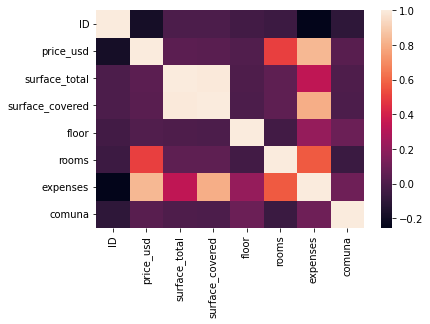

In [23]:
sns.heatmap(propiedades_caba.corr(method='pearson'))
plt.show()

El **coeficiente de correlación de Pearson** mide la relación lineal entre 2 variables. 
Como podemos observar, las variables que se encuentran 100% correlacionadas son surface_total y surface_covered. También, están muy correlacionadas, en menor medida que las anteriores las variables price_usd y expenses, y surface_covered y expenses.

#### Inspeccionamos la cantidad de registros nulos por columna

<AxesSubplot:>

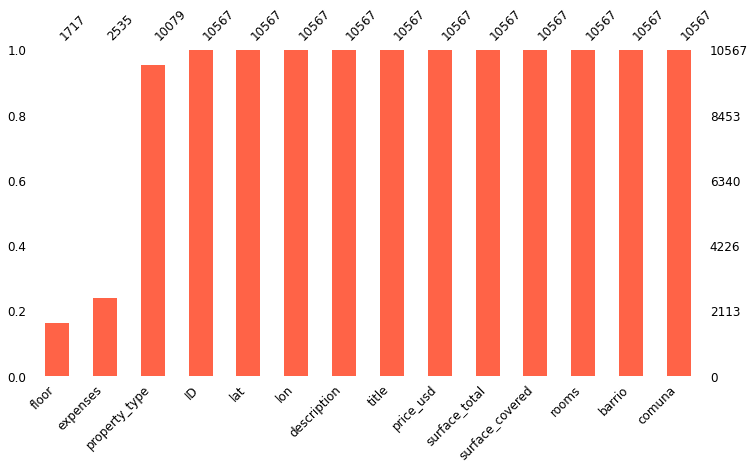

In [24]:
# Analizamos visualmente los datos faltantes
msno.bar(propiedades_caba,figsize=(12, 6), sort="ascending",fontsize=12, color='tomato')

In [25]:
propiedades_caba.isna().sum()

ID                    0
property_type       488
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor              8850
rooms                 0
expenses           8032
barrio                0
comuna                0
dtype: int64

De lo observado precedentemente, podemos advertir que hay 3 columnas que poseen datos nulos. 
Para poder trabajar de manera correcta, debemos resolver que hacer con dichos datos nulos.
En el caso del tipo de propiedad, los registros nulos deben necesariamente imputarse con alguno de los tipos de propiedad existentes. Podríamos imputarlos con información de la columna 'title'.
En el caso de floor, puede que el dato nulo tenga su origen en que se trata de una casa, o que la propiedad está en planta baja.
En relación a las expensas, podría tratarse de datos perdidos, o de propiedades que no pagan expensas.
A continuación, vamos a investigar un poco más en relación a los datos para tomar decisiones con los datos faltantes.
Un buen punto de partida, es realizar un análisis de correlación entre las variables.

### Curación de datos

In [26]:
# Filtro las filas en las que property_type es nula
nan_rows = propiedades_caba[propiedades_caba['property_type'].isnull()]

In [27]:
nan_rows.head()

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
177,8527,NaN,-345.731.455.731,-584.798.744.968,Terminaciones: Agua caliente central Carpinter...,OL RESIDENCES - 2 amb. en Duplex!!!.|.APARTMENT,198044,46,39,NaN,2,NaN,VILLA URQUIZA,12
187,1016,NaN,-345.572.955.161,-584.422.990.308,Increíble 3 ambientes mas dependencia de servi...,Artilleros 1900 - Belgrano Bajo - Capital Fede...,720000,131,131,NaN,3,NaN,BELGRANO,13
188,3526,NaN,-345.879.690.743,-58.398.635.373.000.000,"Amplio hall de entrada, Gran Living Comedor, 2...","EDIFICIO de ESTILO, MUY BUENA CATEGORÍA FRENT...",220000,76,76,NaN,3,NaN,RECOLETA,2
208,67,NaN,-3.461.000.739.999.990,-583.820.397,APTO CRÉDITO - EXCELENTE DEPTO. CON VISTA ABIE...,Departamento - Microcentro.|.APARTMENT,85000,34,34,NaN,2,1750.0,MONSERRAT,1
222,9233,NaN,-34.645.916.799.999.900,-58.377.410.399.999.900,CASA 4 AMBIENTES. IMPECABLE. 320 M2. TODO SOL....,CASA EN VENTA.|.HOUSE,280000,320,320,NaN,4,NaN,BARRACAS,4


In [28]:
nan_rows.shape

(488, 14)

In [29]:
f = lambda b: 'APARTMENT' in b
title1 = propiedades_caba.title.apply(f)

In [30]:
propiedades_caba[title1].title


0        Venta Departamento 2 ambientes 52m2 cochera Ap...
1        Guemes y C.Díaz - Piso de 4 c/dependencia en v...
2        Venta. Departamento 2 Ambientes. Guemes 4400. ...
3                        DEPARTAMENTO EN VENTA.|.APARTMENT
4        VENTA: Importante piso muy alto en torre de ca...
                               ...                        
10562    MONOAMBIENTE A ESTRENAR AL FRENTE CON BALCON.|...
10563    Bolivia    4694 - U$D 168.000 - Departamento e...
10564                  AV. CORRIENTES 1100 10º.|.APARTMENT
10565    Venta. Monoambiente en piso alto. 32 mtrs². Sa...
10566                   Departamento - Palermo.|.APARTMENT
Name: title, Length: 9771, dtype: object

In [31]:
solo_deptos_prov =propiedades_caba[title1].title


In [32]:
# Concatenamos los conjuntos de datos con datos faltantes en tipo de propiedad, y los que me indican que son deptos
deptos = pd.merge(nan_rows, solo_deptos_prov, how='left', left_index=True, right_index=True)

In [33]:
deptos.shape

(488, 15)

In [34]:
deptos.head()

,ID,property_type,lat,lon,description,title_x,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,title_y
177,8527,NaN,-345.731.455.731,-584.798.744.968,Terminaciones: Agua caliente central Carpinter...,OL RESIDENCES - 2 amb. en Duplex!!!.|.APARTMENT,198044,46,39,NaN,2,NaN,VILLA URQUIZA,12,OL RESIDENCES - 2 amb. en Duplex!!!.|.APARTMENT
187,1016,NaN,-345.572.955.161,-584.422.990.308,Increíble 3 ambientes mas dependencia de servi...,Artilleros 1900 - Belgrano Bajo - Capital Fede...,720000,131,131,NaN,3,NaN,BELGRANO,13,Artilleros 1900 - Belgrano Bajo - Capital Fede...
188,3526,NaN,-345.879.690.743,-58.398.635.373.000.000,"Amplio hall de entrada, Gran Living Comedor, 2...","EDIFICIO de ESTILO, MUY BUENA CATEGORÍA FRENT...",220000,76,76,NaN,3,NaN,RECOLETA,2,"EDIFICIO de ESTILO, MUY BUENA CATEGORÍA FRENT..."
208,67,NaN,-3.461.000.739.999.990,-583.820.397,APTO CRÉDITO - EXCELENTE DEPTO. CON VISTA ABIE...,Departamento - Microcentro.|.APARTMENT,85000,34,34,NaN,2,1750.0,MONSERRAT,1,Departamento - Microcentro.|.APARTMENT
222,9233,NaN,-34.645.916.799.999.900,-58.377.410.399.999.900,CASA 4 AMBIENTES. IMPECABLE. 320 M2. TODO SOL....,CASA EN VENTA.|.HOUSE,280000,320,320,NaN,4,NaN,BARRACAS,4,NaN


In [35]:
deptos.columns

Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title_x',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'barrio', 'comuna', 'title_y'],
      dtype='object')

In [36]:
deptos.rename({'title_y': 'type'}, axis=1, inplace=True)

In [37]:
deptos['type']

177        OL RESIDENCES - 2 amb. en Duplex!!!.|.APARTMENT
187      Artilleros 1900 - Belgrano Bajo - Capital Fede...
188      EDIFICIO de ESTILO,  MUY BUENA CATEGORÍA FRENT...
208                 Departamento - Microcentro.|.APARTMENT
222                                                    NaN
                               ...                        
10441                    DEPARTAMENTO EN VENTA.|.APARTMENT
10467                    DEPARTAMENTO EN VENTA.|.APARTMENT
10474                                                  NaN
10481    IMPONENTE PISO 6 AMBIENTES CON COCHERA VISTA A...
10532    DEPARTAMENTO DE 4 AMBIENTES CON BALCON INTERNO...
Name: type, Length: 488, dtype: object

In [38]:
deptos.isna().sum()

ID                   0
property_type      488
lat                  0
lon                  0
description          0
title_x              0
price_usd            0
surface_total        0
surface_covered      0
floor              414
rooms                0
expenses           362
barrio               0
comuna               0
type                28
dtype: int64

In [39]:
# Filtro las filas en las que type es nula, para luego imputarles el tipo 'house'
nan_rows2 = deptos[deptos['type'].isnull()]

In [40]:
nan_rows2.head()

,ID,property_type,lat,lon,description,title_x,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,type
222,9233,NaN,-34.645.916.799.999.900,-58.377.410.399.999.900,CASA 4 AMBIENTES. IMPECABLE. 320 M2. TODO SOL....,CASA EN VENTA.|.HOUSE,280000,320,320,NaN,4,NaN,BARRACAS,4,NaN
273,5792,NaN,-346.421.213,-585.105.993,HERMOSO CHALET EN VILLA LURO de 4 amb con coch...,CASA EN VENTA.|.HOUSE,650000,340,210,NaN,4,NaN,LINIERS,9,NaN
836,4884,NaN,-34.618.376,-58.485.439,Corredor Responsable: Patricia Maria Sodor - C...,Casa 5 amb. Cochera Parque y Parrilla!!!.|.HOUSE,335000,270,214,NaN,5,NaN,VILLA SANTA RITA,11,NaN
900,10564,NaN,-346.911.595,-58.470.592,"En venta, casa a refaccionar!!TERRENO 8.66 X 2...",SE VENDE CASA A REFACCIONAR VILLA LUGANO.|.HOUSE,140000,185,120,NaN,3,NaN,VILLA RIACHUELO,8,NaN
999,7108,NaN,-34.601.364.200.000.000,-584.713.192,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Venta Casa 5 amb cocheras quincho hermosa mode...,450000,230,209,NaN,5,NaN,PATERNAL,15,NaN


In [41]:
nan_rows2.rename({'title_x': 'title'}, axis=1, inplace=True)

/var/folders/n2/xr5yjlg94nz19djzmwz0ls640000gp/T/ipykernel_56989/1316963496.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows2.rename({'title_x': 'title'}, axis=1, inplace=True)


In [42]:
print(nan_rows2['property_type'].fillna('house'))

222      house
273      house
836      house
900      house
999      house
1825     house
1938     house
2060     house
2860     house
3153     house
3168     house
3528     house
4017     house
4885     house
5142     house
6068     house
6409     house
7389     house
7421     house
7441     house
7974     house
8390     house
8565     house
9082     house
9428     house
9576     house
10035    house
10474    house
Name: property_type, dtype: object


#### Imputamos parte de los valores nulos de la columna property_type por 'house'

In [43]:
nan_rows2['property_type']=nan_rows2['property_type'].fillna('house')

/var/folders/n2/xr5yjlg94nz19djzmwz0ls640000gp/T/ipykernel_56989/2620858688.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nan_rows2['property_type']=nan_rows2['property_type'].fillna('house')


In [44]:
nan_rows2.head(5)

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna,type
222,9233,house,-34.645.916.799.999.900,-58.377.410.399.999.900,CASA 4 AMBIENTES. IMPECABLE. 320 M2. TODO SOL....,CASA EN VENTA.|.HOUSE,280000,320,320,NaN,4,NaN,BARRACAS,4,NaN
273,5792,house,-346.421.213,-585.105.993,HERMOSO CHALET EN VILLA LURO de 4 amb con coch...,CASA EN VENTA.|.HOUSE,650000,340,210,NaN,4,NaN,LINIERS,9,NaN
836,4884,house,-34.618.376,-58.485.439,Corredor Responsable: Patricia Maria Sodor - C...,Casa 5 amb. Cochera Parque y Parrilla!!!.|.HOUSE,335000,270,214,NaN,5,NaN,VILLA SANTA RITA,11,NaN
900,10564,house,-346.911.595,-58.470.592,"En venta, casa a refaccionar!!TERRENO 8.66 X 2...",SE VENDE CASA A REFACCIONAR VILLA LUGANO.|.HOUSE,140000,185,120,NaN,3,NaN,VILLA RIACHUELO,8,NaN
999,7108,house,-34.601.364.200.000.000,-584.713.192,Corredor Responsable: JUAN FRANCISCO CARATTINO...,Venta Casa 5 amb cocheras quincho hermosa mode...,450000,230,209,NaN,5,NaN,PATERNAL,15,NaN


In [45]:
nan_rows2.shape

(28, 15)

In [46]:
nan_rows2['ID']

222       9233
273       5792
836       4884
900      10564
999       7108
1825      9365
1938      7096
2060      6063
2860      6011
3153      9728
3168     10090
3528      9433
4017      5481
4885      6646
5142      6578
6068      1709
6409      5966
7389      4979
7421      9716
7441     10427
7974       380
8390      2441
8565      6029
9082      6250
9428      9308
9576      8889
10035     7106
10474     9699
Name: ID, dtype: int64

In [47]:
id_house = nan_rows2['ID']

In [48]:
# Filtramos del dataset original, los ID que imputamos con 'house', y creamos un df nuevo sin esos ID para concatenar 
filtered_df=propiedades_caba[~propiedades_caba.ID.isin(id_house)]

In [49]:
filtered_df.shape

(10539, 14)

In [50]:
filtered_df

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100000,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350000,111,104,NaN,4,5000.0,PALERMO,14
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93500,32,32,NaN,2,NaN,PALERMO,14
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,3 AMBIENTES. CONTRAFRENTE. 55 M2. IMPECABLE. V...,DEPARTAMENTO EN VENTA.|.APARTMENT,140000,55,55,3.0,3,1733.0,ALMAGRO,5
4,946,apartment,-34.573.452,-584.615.581,"LIVING/COMEDOR, TOILETTE, 3 DORMITORIOS (SUITE...",VENTA: Importante piso muy alto en torre de ca...,690000,185,185,NaN,4,NaN,BELGRANO,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,431,apartment,-34.556.834,-5.845.995.500.000.000,Corredor Responsable: Marcelo Trujillo - CUCIC...,MONOAMBIENTE A ESTRENAR AL FRENTE CON BALCON.|...,112900,39,36,1.0,1,NaN,BELGRANO,13
10563,5580,apartment,-3.460.287.476,-5.841.070.938,Ciudad:Capital fe-Zona:Residencial-Asfalto-Osn...,Bolivia 4694 - U$D 168.000 - Departamento e...,168000,73,62,10.0,2,NaN,BALVANERA,3
10564,7470,apartment,-3.460.404.260.000.000,-58.383.418.500.000.000,VENTA MONAMBIENTE A LATERAL.MUY LUMINOSIDAD.C...,AV. CORRIENTES 1100 10º.|.APARTMENT,70000,23,23,NaN,1,1400.0,SAN NICOLAS,1
10565,5323,apartment,-346.150.319.346,-584.047.450.392,- Hermoso monoambiente en 9° piso. - Superfici...,Venta. Monoambiente en piso alto. 32 mtrs². Sa...,73900,32,32,NaN,1,NaN,BALVANERA,3


#### Concatenamos los DF: 1) DF con nulos donde imputamos propiedades tipo 'house'; 2) DF original sin considerar los ID de 1)

In [51]:
propiedades_caba_curado = pd.concat([filtered_df, nan_rows2], axis=0)

In [52]:
# Eliminamos las columnas que no necesitamos
propiedades_caba_curado = propiedades_caba_curado.drop(columns=['type'])

In [53]:
propiedades_caba_curado.head()

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100000,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350000,111,104,NaN,4,5000.0,PALERMO,14
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93500,32,32,NaN,2,NaN,PALERMO,14
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,3 AMBIENTES. CONTRAFRENTE. 55 M2. IMPECABLE. V...,DEPARTAMENTO EN VENTA.|.APARTMENT,140000,55,55,3.0,3,1733.0,ALMAGRO,5
4,946,apartment,-34.573.452,-584.615.581,"LIVING/COMEDOR, TOILETTE, 3 DORMITORIOS (SUITE...",VENTA: Importante piso muy alto en torre de ca...,690000,185,185,NaN,4,NaN,BELGRANO,13


In [54]:
#propiedades_caba_curado['title_final'] = propiedades_caba_curado.title.str.cat(propiedades_caba_curado.title_x)

In [55]:
propiedades_caba_curado.shape

(10567, 14)

In [56]:
propiedades_caba_curado.isna().sum()

ID                    0
property_type       460
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor              8850
rooms                 0
expenses           8032
barrio                0
comuna                0
dtype: int64

#### Imputamos el resto de los valores nulos de la columna property_type por 'apartment'

In [57]:
propiedades_caba_curado['property_type']=propiedades_caba_curado['property_type'].fillna('apartment')

In [58]:
# Verificamos que se hayan imputado correctamente
propiedades_caba_curado.isna().sum()

ID                    0
property_type         0
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor              8850
rooms                 0
expenses           8032
barrio                0
comuna                0
dtype: int64

In [59]:
# Inspeccionamos la cantidad de propiedades de cada tipo
propiedades_caba['property_type'].groupby(propiedades_caba_curado['property_type']).count()

property_type
apartment    9311
house         768
Name: property_type, dtype: int64

In [60]:
propiedades_caba.shape

(10567, 14)

In [61]:
propiedades_caba_curado.isna().sum()

ID                    0
property_type         0
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor              8850
rooms                 0
expenses           8032
barrio                0
comuna                0
dtype: int64

#### Curamos el resto de las columnas de los inmuebles de tipología  house

In [62]:
# Filtramos las casas
solo_casas = propiedades_caba_curado[propiedades_caba_curado['property_type']=='house']

In [63]:
solo_casas.head(5)

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
10,10108,house,-346.474.215,-58.495.243.200.000.000,"Se ingresa a un living comedor de 4,70 x 4 con...",Casa - Mataderos.|.HOUSE,180000,100,100,NaN,3,NaN,MATADEROS,9
22,4792,house,-3.454.950.333,-5.845.836.639,Ciudad:Capital fe-Zona:Residencial-Asfalto-Pro...,Guayra 1800 - U$D 153.000 - Tipo casa PH en...,153000,63,63,1.0,1,NaN,NUÑEZ,13
28,6073,house,-34.623.331,-585.044.576,Ciudad:Capital fe-Zona:Buena-Asfalto-Informaci...,Cap J G Bermudez 1600 - U$D 75.000 - Tipo c...,75000,66,66,2.0,2,NaN,MONTE CASTRO,10
63,5815,house,-346.476.198.967,-585.104.939.923,Corredor Responsable: Marcelo Trujillo - CUCIC...,HERMOSA CASA EN LA MEJOR ZONA DE LINIERS.|.HOUSE,340000,323,147,NaN,4,NaN,LINIERS,9
67,911,house,-34.549.591,-58.448.598,Corredor Responsable: Raul Hector Merlo - CUCI...,Casa barrio River a reciclar.|.HOUSE,420000,210,210,NaN,5,NaN,BELGRANO,13


In [64]:
solo_casas.isna().sum()

ID                   0
property_type        0
lat                  0
lon                  0
description          0
title                0
price_usd            0
surface_total        0
surface_covered      0
floor              661
rooms                0
expenses           792
barrio               0
comuna               0
dtype: int64

Al tratarse de **casas**, se reimputan las columnas **floor** y **expenses** por 0, para simplificar el análisis, considerando que al tratarse de ese tipo de viviendas es razonable que no tengan piso ni expensas. 

In [65]:
solo_casas = solo_casas.fillna(0)

In [66]:
solo_casas.isna().sum()

ID                 0
property_type      0
lat                0
lon                0
description        0
title              0
price_usd          0
surface_total      0
surface_covered    0
floor              0
rooms              0
expenses           0
barrio             0
comuna             0
dtype: int64

#### Curamos el resto de las columnas de los inmuebles de tipología apartment

In [67]:
# Filtramos los departamentos
solo_deptos = propiedades_caba_curado[propiedades_caba_curado['property_type']=='apartment']

In [68]:
solo_deptos

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
0,5415,apartment,-346.115.808,-584.101.838,Departamento de 2 ambientes superficie total 5...,Venta Departamento 2 ambientes 52m2 cochera Ap...,100000,52,44,NaN,2,NaN,BALVANERA,3
1,1761,apartment,-345.904.453,-58.410.856.200.000.000,Piso de 4 ambientes con dependencia y balcón a...,Guemes y C.Díaz - Piso de 4 c/dependencia en v...,350000,111,104,NaN,4,5000.0,PALERMO,14
2,1826,apartment,-345.829.338.033,-584.219.018.513,Living comedor.Dormitorios 1 con placard. Coci...,Venta. Departamento 2 Ambientes. Guemes 4400. ...,93500,32,32,NaN,2,NaN,PALERMO,14
3,3410,apartment,-346.149.296,-58.426.629.000.000.000,3 AMBIENTES. CONTRAFRENTE. 55 M2. IMPECABLE. V...,DEPARTAMENTO EN VENTA.|.APARTMENT,140000,55,55,3.0,3,1733.0,ALMAGRO,5
4,946,apartment,-34.573.452,-584.615.581,"LIVING/COMEDOR, TOILETTE, 3 DORMITORIOS (SUITE...",VENTA: Importante piso muy alto en torre de ca...,690000,185,185,NaN,4,NaN,BELGRANO,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,431,apartment,-34.556.834,-5.845.995.500.000.000,Corredor Responsable: Marcelo Trujillo - CUCIC...,MONOAMBIENTE A ESTRENAR AL FRENTE CON BALCON.|...,112900,39,36,1.0,1,NaN,BELGRANO,13
10563,5580,apartment,-3.460.287.476,-5.841.070.938,Ciudad:Capital fe-Zona:Residencial-Asfalto-Osn...,Bolivia 4694 - U$D 168.000 - Departamento e...,168000,73,62,10.0,2,NaN,BALVANERA,3
10564,7470,apartment,-3.460.404.260.000.000,-58.383.418.500.000.000,VENTA MONAMBIENTE A LATERAL.MUY LUMINOSIDAD.C...,AV. CORRIENTES 1100 10º.|.APARTMENT,70000,23,23,NaN,1,1400.0,SAN NICOLAS,1
10565,5323,apartment,-346.150.319.346,-584.047.450.392,- Hermoso monoambiente en 9° piso. - Superfici...,Venta. Monoambiente en piso alto. 32 mtrs². Sa...,73900,32,32,NaN,1,NaN,BALVANERA,3


In [69]:
solo_deptos.isna().sum()

ID                    0
property_type         0
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor              8189
rooms                 0
expenses           7240
barrio                0
comuna                0
dtype: int64

In [70]:
# Analizamos la correlación de variables en el conjunto de datos relacionado a solo deptos
solo_deptos.corr(method='pearson')

,ID,price_usd,surface_total,surface_covered,floor,rooms,expenses,comuna
ID,1.000000,-0.197822,-0.058994,-0.059950,-0.031652,-0.122643,-0.255532,-0.119135
price_usd,-0.197822,1.000000,0.209951,0.194267,0.013015,0.527102,0.835768,0.009015
surface_total,-0.058994,0.209951,1.000000,0.888272,0.000664,0.185588,0.336085,0.004524
surface_covered,-0.059950,0.194267,0.888272,1.000000,-0.000728,0.198374,0.813204,-0.006635
floor,-0.031652,0.013015,0.000664,-0.000728,1.000000,-0.055469,0.214803,0.098631
rooms,-0.122643,0.527102,0.185588,0.198374,-0.055469,1.000000,0.571735,-0.098504
expenses,-0.255532,0.835768,0.336085,0.813204,0.214803,0.571735,1.000000,0.100907
comuna,-0.119135,0.009015,0.004524,-0.006635,0.098631,-0.098504,0.100907,1.000000


La variable **expenses** se encuentra áltamente correlacionada con las variables **price_usd** y **surface_covered**.
Por ello, para imputar los valores faltantes de la variable **expenses** vamos a imputar por los valores de la columna **price_usd**. 
En relación a la variable **floor**, no se observa que tenga alta correlación con ninguna de las otras variables del dataset, incluso, en relación a la variable **price_usd** que es nuestra variable objetivo, por lo que vamos a imputar los valores faltantes de dicha variable por 0.

**1.Imputamos los valores faltantes de la variable floor por 0**

In [71]:
solo_deptos['floor']=solo_deptos['floor'].fillna(0)

/var/folders/n2/xr5yjlg94nz19djzmwz0ls640000gp/T/ipykernel_56989/2453717686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solo_deptos['floor']=solo_deptos['floor'].fillna(0)


In [72]:
solo_deptos.columns

Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'barrio', 'comuna'],
      dtype='object')

**2. Unimos los datasets de casas y departamentos**

In [73]:
propiedades_caba_prov = pd.concat([solo_casas, solo_deptos], axis=0)

In [74]:
propiedades_caba_prov

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
10,10108,house,-346.474.215,-58.495.243.200.000.000,"Se ingresa a un living comedor de 4,70 x 4 con...",Casa - Mataderos.|.HOUSE,180000,100,100,0.0,3,0.0,MATADEROS,9
22,4792,house,-3.454.950.333,-5.845.836.639,Ciudad:Capital fe-Zona:Residencial-Asfalto-Pro...,Guayra 1800 - U$D 153.000 - Tipo casa PH en...,153000,63,63,1.0,1,0.0,NUÑEZ,13
28,6073,house,-34.623.331,-585.044.576,Ciudad:Capital fe-Zona:Buena-Asfalto-Informaci...,Cap J G Bermudez 1600 - U$D 75.000 - Tipo c...,75000,66,66,2.0,2,0.0,MONTE CASTRO,10
63,5815,house,-346.476.198.967,-585.104.939.923,Corredor Responsable: Marcelo Trujillo - CUCIC...,HERMOSA CASA EN LA MEJOR ZONA DE LINIERS.|.HOUSE,340000,323,147,0.0,4,0.0,LINIERS,9
67,911,house,-34.549.591,-58.448.598,Corredor Responsable: Raul Hector Merlo - CUCI...,Casa barrio River a reciclar.|.HOUSE,420000,210,210,0.0,5,0.0,BELGRANO,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10562,431,apartment,-34.556.834,-5.845.995.500.000.000,Corredor Responsable: Marcelo Trujillo - CUCIC...,MONOAMBIENTE A ESTRENAR AL FRENTE CON BALCON.|...,112900,39,36,1.0,1,NaN,BELGRANO,13
10563,5580,apartment,-3.460.287.476,-5.841.070.938,Ciudad:Capital fe-Zona:Residencial-Asfalto-Osn...,Bolivia 4694 - U$D 168.000 - Departamento e...,168000,73,62,10.0,2,NaN,BALVANERA,3
10564,7470,apartment,-3.460.404.260.000.000,-58.383.418.500.000.000,VENTA MONAMBIENTE A LATERAL.MUY LUMINOSIDAD.C...,AV. CORRIENTES 1100 10º.|.APARTMENT,70000,23,23,0.0,1,1400.0,SAN NICOLAS,1
10565,5323,apartment,-346.150.319.346,-584.047.450.392,- Hermoso monoambiente en 9° piso. - Superfici...,Venta. Monoambiente en piso alto. 32 mtrs². Sa...,73900,32,32,0.0,1,NaN,BALVANERA,3


In [75]:
propiedades_caba_prov.isna().sum()

ID                    0
property_type         0
lat                   0
lon                   0
description           0
title                 0
price_usd             0
surface_total         0
surface_covered       0
floor                 0
rooms                 0
expenses           7240
barrio                0
comuna                0
dtype: int64

In [76]:
propiedades_caba_prov.shape

(10567, 14)

**3. Imputamos los valores faltantes de la variable expenses con KNNImputer**


K-Nearest Neighbor es un algoritmo muy utilizado para una clasificación simple. El algoritmo utiliza "similitud de características" para predecir los valores de cualquier nuevo punto de datos. Esto significa que al nuevo punto se le asigna un valor en función de su parecido con los puntos del conjunto de entrenamiento.

**4. Transformamos las columnas categóricas de interés: ENCODING**

Previo a imputar los valores faltantes, vamos a transformar en números la variable categórica que nos interesa para luego utilizarla en la imputación.

In [77]:
# Variable que vamos a codificar = barrio
propiedades_caba_prov['barrio'].value_counts()

PALERMO              1693
RECOLETA             1145
BELGRANO              784
BALVANERA             578
CABALLITO             551
ALMAGRO               448
FLORES                442
RETIRO                409
VILLA CRESPO          386
VILLA URQUIZA         339
NUÑEZ                 297
SAN NICOLAS           278
COLEGIALES            208
VILLA DEVOTO          201
MONSERRAT             200
PUERTO MADERO         190
SAAVEDRA              174
CONSTITUCION          133
BARRACAS              129
VILLA DEL PARQUE      124
LINIERS               119
SAN CRISTOBAL         104
MONTE CASTRO           98
FLORESTA               97
SAN TELMO              96
CHACARITA              86
VILLA PUEYRREDON       86
COGHLAN                84
VILLA GRAL. MITRE      84
PARQUE CHACABUCO       84
VILLA ORTUZAR          82
BOCA                   76
VELEZ SARSFIELD        73
MATADEROS              71
BOEDO                  66
PARQUE CHAS            64
VILLA LURO             64
PARQUE PATRICIOS       64
VILLA LUGANO

In [78]:
# Creamos una funcion que va recibir 2 variables, la primera es un dataset y la segunda el nombre de la columna que voy a transformar

def oneHotEncoder (df, columna):
    temp = pd.get_dummies(df[columna], prefix = columna)
    df = df.drop(columna, axis="columns")
    df = pd.concat([df, temp], axis="columns")
    return df

In [79]:
# aplico la funcion  de encoding al dataset  y a la columna barrio

prop_caba_final_onehot=oneHotEncoder(propiedades_caba_prov,'barrio')

In [80]:
prop_caba_final_onehot.columns

Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'comuna', 'barrio_AGRONOMIA', 'barrio_ALMAGRO',
       'barrio_BALVANERA', 'barrio_BARRACAS', 'barrio_BELGRANO', 'barrio_BOCA',
       'barrio_BOEDO', 'barrio_CABALLITO', 'barrio_CHACARITA',
       'barrio_COGHLAN', 'barrio_COLEGIALES', 'barrio_CONSTITUCION',
       'barrio_FLORES', 'barrio_FLORESTA', 'barrio_LINIERS',
       'barrio_MATADEROS', 'barrio_MONSERRAT', 'barrio_MONTE CASTRO',
       'barrio_NUEVA POMPEYA', 'barrio_NUÑEZ', 'barrio_PALERMO',
       'barrio_PARQUE AVELLANEDA', 'barrio_PARQUE CHACABUCO',
       'barrio_PARQUE CHAS', 'barrio_PARQUE PATRICIOS', 'barrio_PATERNAL',
       'barrio_PUERTO MADERO', 'barrio_RECOLETA', 'barrio_RETIRO',
       'barrio_SAAVEDRA', 'barrio_SAN CRISTOBAL', 'barrio_SAN NICOLAS',
       'barrio_SAN TELMO', 'barrio_VELEZ SARSFIELD', 'barrio_VERSALLES',
       'barrio_VILLA CRESPO', 'bar

In [81]:
# Cambio el índice, para que sea el ID
prop_caba_final_onehot.set_index('ID', inplace = True)

In [82]:
propiedades_caba_prov.columns

Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'barrio', 'comuna'],
      dtype='object')

In [83]:
col_drop = propiedades_caba_prov[['ID', 'property_type', 'lat', 'lon', 'description', 'title','barrio']]


In [84]:
propiedades_caba_prov.head()

,ID,property_type,lat,lon,description,title,price_usd,surface_total,surface_covered,floor,rooms,expenses,barrio,comuna
10,10108,house,-346.474.215,-58.495.243.200.000.000,"Se ingresa a un living comedor de 4,70 x 4 con...",Casa - Mataderos.|.HOUSE,180000,100,100,0.0,3,0.0,MATADEROS,9
22,4792,house,-3.454.950.333,-5.845.836.639,Ciudad:Capital fe-Zona:Residencial-Asfalto-Pro...,Guayra 1800 - U$D 153.000 - Tipo casa PH en...,153000,63,63,1.0,1,0.0,NUÑEZ,13
28,6073,house,-34.623.331,-585.044.576,Ciudad:Capital fe-Zona:Buena-Asfalto-Informaci...,Cap J G Bermudez 1600 - U$D 75.000 - Tipo c...,75000,66,66,2.0,2,0.0,MONTE CASTRO,10
63,5815,house,-346.476.198.967,-585.104.939.923,Corredor Responsable: Marcelo Trujillo - CUCIC...,HERMOSA CASA EN LA MEJOR ZONA DE LINIERS.|.HOUSE,340000,323,147,0.0,4,0.0,LINIERS,9
67,911,house,-34.549.591,-58.448.598,Corredor Responsable: Raul Hector Merlo - CUCI...,Casa barrio River a reciclar.|.HOUSE,420000,210,210,0.0,5,0.0,BELGRANO,13


In [85]:
# Eliminamos la columnas que no se van a utilizar en la imputación
prop_caba_knn = prop_caba_final_onehot.drop(columns=['property_type', 'lat', 'lon', 'description', 'title'])

In [86]:
# Imputamos los valores faltantes con KNN
imputer = KNNImputer(n_neighbors=2, weights="uniform")
prop_caba_knn = pd.DataFrame(imputer.fit_transform(prop_caba_knn),columns=prop_caba_knn.columns)


In [87]:
prop_caba_knn.head(3)

,price_usd,surface_total,surface_covered,floor,rooms,expenses,comuna,barrio_AGRONOMIA,barrio_ALMAGRO,barrio_BALVANERA,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
0,180000.0,100.0,100.0,0.0,3.0,0.0,9.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,153000.0,63.0,63.0,1.0,1.0,0.0,13.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75000.0,66.0,66.0,2.0,2.0,0.0,10.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**5. Concatenamos el dataset numérico imputado, y el de los datos categóricos, poara obtener el dataset final**

In [88]:
propiedades_caba_final = pd.concat([col_drop, prop_caba_knn], axis=1)

In [89]:
propiedades_caba_final.head(3)

,ID,property_type,lat,lon,description,title,barrio,price_usd,surface_total,surface_covered,...,barrio_VILLA GRAL. MITRE,barrio_VILLA LUGANO,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA
10,10108,house,-346.474.215,-58.495.243.200.000.000,"Se ingresa a un living comedor de 4,70 x 4 con...",Casa - Mataderos.|.HOUSE,MATADEROS,260000.0,150.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22,4792,house,-3.454.950.333,-5.845.836.639,Ciudad:Capital fe-Zona:Residencial-Asfalto-Pro...,Guayra 1800 - U$D 153.000 - Tipo casa PH en...,NUÑEZ,285000.0,215.0,160.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28,6073,house,-34.623.331,-585.044.576,Ciudad:Capital fe-Zona:Buena-Asfalto-Informaci...,Cap J G Bermudez 1600 - U$D 75.000 - Tipo c...,MONTE CASTRO,850000.0,456.0,412.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [90]:
# Verificamos que no hayan quedado registros nulos
propiedades_caba_final.isna().sum()

ID                         0
property_type              0
lat                        0
lon                        0
description                0
                          ..
barrio_VILLA REAL          0
barrio_VILLA RIACHUELO     0
barrio_VILLA SANTA RITA    0
barrio_VILLA SOLDATI       0
barrio_VILLA URQUIZA       0
Length: 62, dtype: int64

In [91]:
propiedades_caba_final.columns

Index(['ID', 'property_type', 'lat', 'lon', 'description', 'title', 'barrio',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'comuna', 'barrio_AGRONOMIA', 'barrio_ALMAGRO',
       'barrio_BALVANERA', 'barrio_BARRACAS', 'barrio_BELGRANO', 'barrio_BOCA',
       'barrio_BOEDO', 'barrio_CABALLITO', 'barrio_CHACARITA',
       'barrio_COGHLAN', 'barrio_COLEGIALES', 'barrio_CONSTITUCION',
       'barrio_FLORES', 'barrio_FLORESTA', 'barrio_LINIERS',
       'barrio_MATADEROS', 'barrio_MONSERRAT', 'barrio_MONTE CASTRO',
       'barrio_NUEVA POMPEYA', 'barrio_NUÑEZ', 'barrio_PALERMO',
       'barrio_PARQUE AVELLANEDA', 'barrio_PARQUE CHACABUCO',
       'barrio_PARQUE CHAS', 'barrio_PARQUE PATRICIOS', 'barrio_PATERNAL',
       'barrio_PUERTO MADERO', 'barrio_RECOLETA', 'barrio_RETIRO',
       'barrio_SAAVEDRA', 'barrio_SAN CRISTOBAL', 'barrio_SAN NICOLAS',
       'barrio_SAN TELMO', 'barrio_VELEZ SARSFIELD', 'barrio_VERSALLES',
       'barrio_VILLA CRE

In [92]:
# Convertimos a número entero el valor de price_usd
propiedades_caba_final['price_usd'] = propiedades_caba_final['price_usd'].astype(int)

### Eliminación de outliers
Teniendo en cuenta que nuestra variable a predecir es el precio de venta de las propiedades, vamos a analizar brevemente esta variable para ver su distribución, y sus medidas estadísticas.

<Figure size 720x360 with 0 Axes>

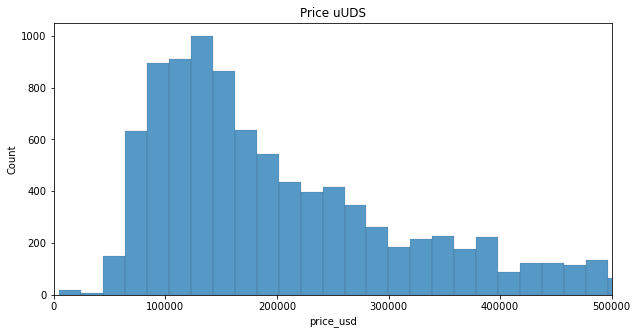

<Figure size 720x360 with 0 Axes>

In [93]:
plt.figure(figsize=(10, 5))
sns.histplot(data=propiedades_caba_final['price_usd'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Price uUDS')
plt.xlim([0,500000])
plt.figure(figsize=(10, 5))


In [94]:
# Analizamos la variable price_usd original
propiedades_caba_final['price_usd'].describe().round(2)


count       10567.00
mean       304326.24
std        371265.81
min          5043.00
25%        124000.00
50%        189000.00
75%        340000.00
max      11111111.00
Name: price_usd, dtype: float64

Como podemos observar, es muy amplia la diferencia entre el valor mínimo de la variable, y el valor máximo. Esto puede ser un porblema, ya que la media puede no ser representativa, porque puede estar muy influenciada por valores extremos. Para subsanar esta problemática, vamos a eliminar valores extremos utilizando **percentiles**.
Se denomina percentil o quantil k, al valor de nuestros datos que deja el k% de los otros valores por debajo.
A continuación vamos a calcular el percentil 95 de la variable **price_usd**, y vamos a quedarnos con los registros que se encuentren por debajo de ese percentil para continuar nuestros análisis.

In [95]:
k=95
percentile_95= propiedades_caba_final['price_usd'].quantile(k/100)
percentile_95

890000.0

**Limitamos el dataset, considerando sólo los valores de precio de venta <= $890.000**

In [96]:
condition_1=propiedades_caba_final.price_usd <= 890000

propiedades_caba_final=propiedades_caba_final[condition_1]

In [97]:
propiedades_caba_final.shape

(10048, 62)

In [98]:
# Analizamos la variable price_usd sin outliers
propiedades_caba_final['price_usd'].describe().round(2)

count     10048.00
mean     239892.77
std      171657.09
min        5043.00
25%      120000.00
50%      180000.00
75%      300000.00
max      890000.00
Name: price_usd, dtype: float64

### Visualizamos los datos

In [99]:
columnas = ['property_type', 'lat', 'lon', 'description', 'title',
       'price_usd', 'surface_total', 'surface_covered', 'floor', 'rooms',
       'expenses', 'comuna']

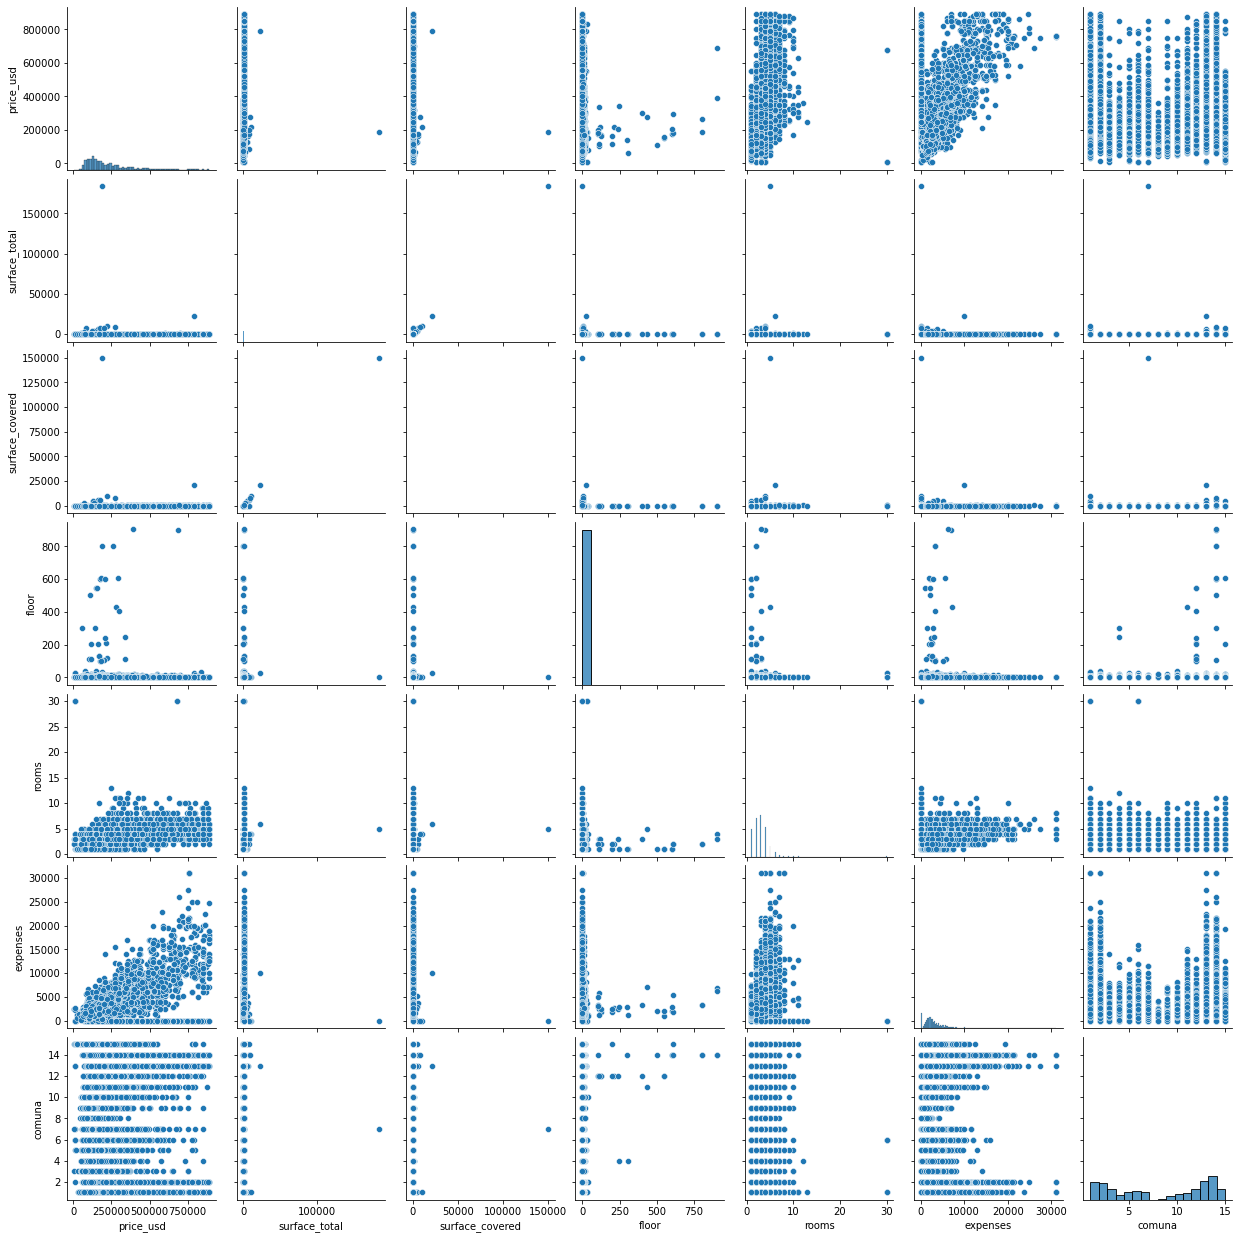

In [100]:
# Visualización general de las variables
sns.pairplot(propiedades_caba_final[columnas])

array([[<AxesSubplot:title={'center':'price_usd'}>,
        <AxesSubplot:title={'center':'surface_total'}>,
        <AxesSubplot:title={'center':'surface_covered'}>],
       [<AxesSubplot:title={'center':'floor'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'expenses'}>],
       [<AxesSubplot:title={'center':'comuna'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

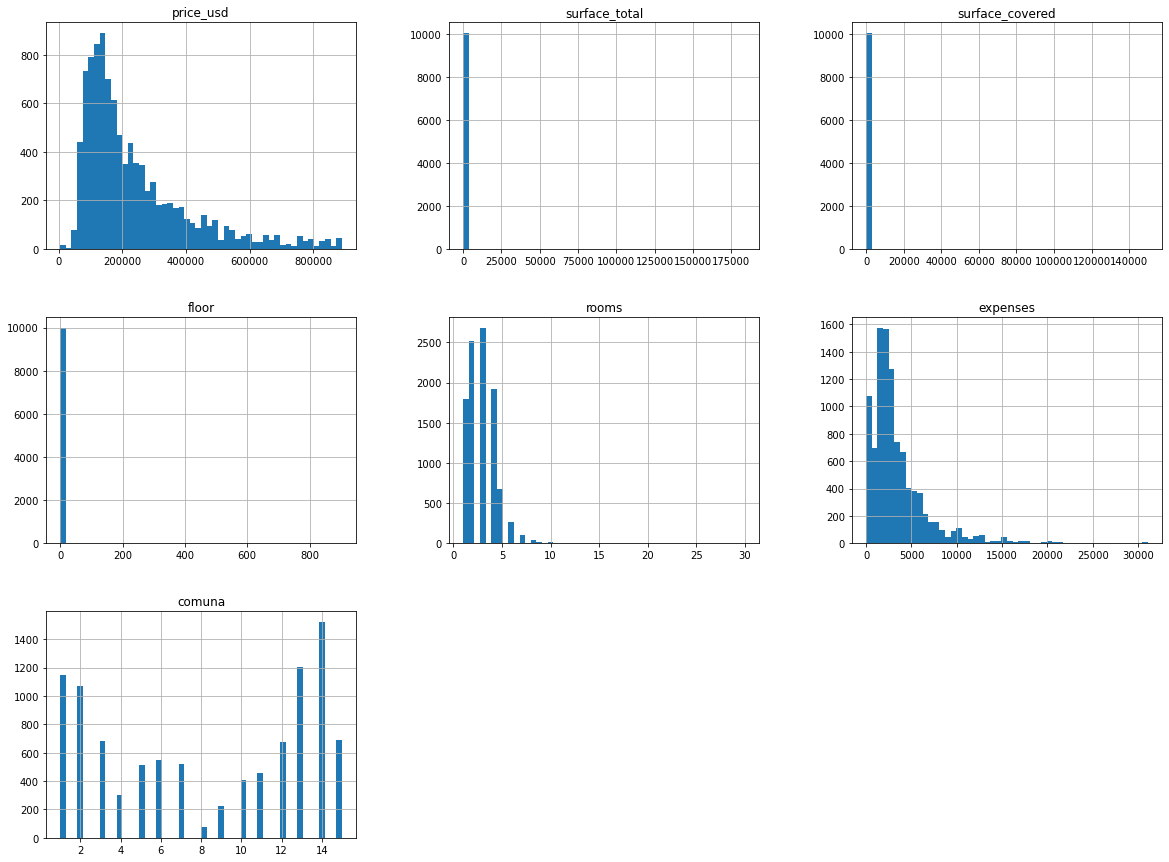

In [101]:
# Visualizamos las variables numéricas actuales
propiedades_caba_final[columnas].hist(bins=50, figsize=(20,15))

Como vimos en el análisis de correlación realizado precedentemente, y visualizando estos gráficos de a pares de variables, podemos confirmar que la variable que más se encuentra corelacionada positivamente al precio de las propiedades es **expenses**.<br>
A continuación vamos a visualizarlas en detalle:

#### Analizamos las variables price_usd y expenses

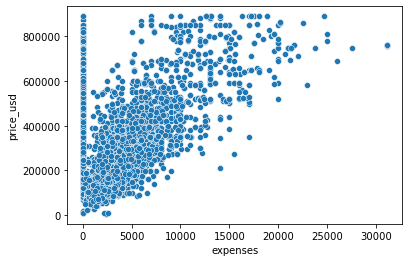

In [102]:
sns.scatterplot(data=propiedades_caba_final,x='expenses', y='price_usd', palette='CMRmap')

# Remove scietific notation
plt.ticklabel_format(useOffset=False, style='plain')

#### Analizamos la variable price_usd

In [103]:
# Analizamos la variable price_usd
propiedades_caba_final['price_usd'].describe().round(2)


count     10048.00
mean     239892.77
std      171657.09
min        5043.00
25%      120000.00
50%      180000.00
75%      300000.00
max      890000.00
Name: price_usd, dtype: float64

<Figure size 720x360 with 0 Axes>

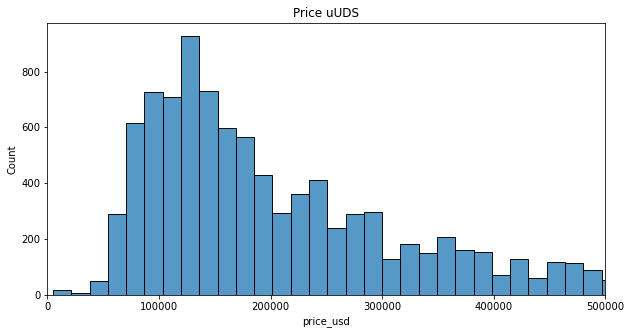

<Figure size 720x360 with 0 Axes>

In [104]:
plt.figure(figsize=(10, 5))
sns.histplot(data=propiedades_caba_final['price_usd'])
plt.ticklabel_format(style='plain', axis='x')
plt.title('Price uUDS')
plt.xlim([0,500000])
plt.figure(figsize=(10, 5))


<AxesSubplot:xlabel='price_usd'>

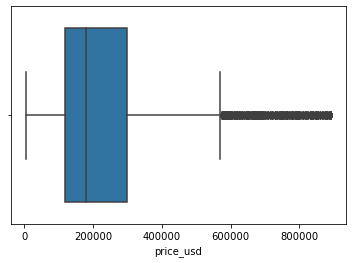

In [105]:
sns.boxplot(data = propiedades_caba_final, x = 'price_usd')



De la visualización preliminar, podemos observar que la variable analizada tendría muchos valores atípicos

#### Analizamos la variable barrio


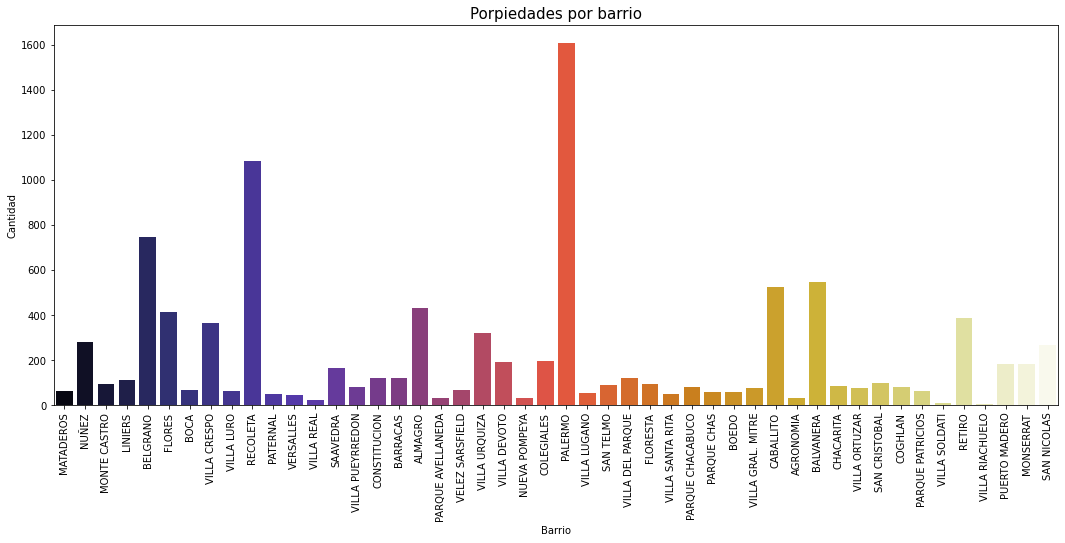

In [106]:
plt.figure(figsize=(18,7))
sns.countplot(x='barrio', data=propiedades_caba_final,palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Barrio')
plt.ylabel('Cantidad')
plt.title('Porpiedades por barrio', fontsize=15)
plt.show()

### Análisis adicional de la base de datos

#### 1. Cuál es el ID del inmueble que requiere mayor gasto/inversión ('price_usd' + 'expenses') para adquirirlo?


In [107]:
propiedades_caba_final['price_and_expenses'] = propiedades_caba_final.price_usd + propiedades_caba_final.expenses

In [108]:
propiedades_caba_final['price_and_expenses'].max()

914700.0

In [109]:
id_maximo =  propiedades_caba_final.loc[propiedades_caba_final["price_and_expenses"].idxmax()]


In [110]:
id_maximo

ID                                                                      9202
property_type                                                          house
lat                                                  -34.652.083.000.000.000
lon                                                              -58.370.631
description                Casa en dos plantas, sobre lote propio de 9,40...
                                                 ...                        
barrio_VILLA RIACHUELO                                                   0.0
barrio_VILLA SANTA RITA                                                  0.0
barrio_VILLA SOLDATI                                                     0.0
barrio_VILLA URQUIZA                                                     0.0
price_and_expenses                                                  914700.0
Name: 2829, Length: 63, dtype: object

El ID del inmueble que requiere mayor inversión (precio + expensas) para adquirirlo es el Nº **9202**

#### 2. Cuál es el ID de la casa ('house') que tiene una superficie descubierta de al menos 800 m2 y su valor ('price_usd') es el más barato?

In [111]:
# Creamos la columna superficie descubierta
propiedades_caba_final['sup_desc'] = propiedades_caba_final.surface_total - propiedades_caba_final.surface_covered

In [112]:
# Filtramos las casas
houses = propiedades_caba_final[propiedades_caba_final['property_type']=='house']

In [113]:
# Convertimos a número entero el valor de price_usd
propiedades_caba_final['sup_desc'] = propiedades_caba_final['sup_desc'].astype(int)

In [114]:
limit1 = houses[houses['sup_desc'] >= 800] 

In [115]:
limit2 = limit1['price_usd'].min()

In [116]:
limit2

790000

In [117]:
id_minimo =  limit1.loc[limit1["price_and_expenses"].idxmin()]


In [118]:
id_minimo

ID                                                                      3691
property_type                                                          house
lat                                                              -34.597.465
lon                                                  -58.387.848.999.999.900
description                Corredor Responsable: Power Bienes Raíces SRL ...
                                                 ...                        
barrio_VILLA SANTA RITA                                                  0.0
barrio_VILLA SOLDATI                                                     0.0
barrio_VILLA URQUIZA                                                     0.0
price_and_expenses                                                  800000.0
sup_desc                                                              2167.0
Name: 5934, Length: 64, dtype: object

El ID que cumple con las condiciones solicitadas es el Nº **3691**

#### 3. Obtener el TOP de las 3 propiedades más caras, para cada tipo de propiedad 

In [119]:
# PARA CASAS
houses.nlargest(3, ['price_usd'])

,ID,property_type,lat,lon,description,title,barrio,price_usd,surface_total,surface_covered,...,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA,price_and_expenses,sup_desc
550,10267,house,-345.744.895,-584.589.525,*Casa de 2 Plantas* Sep cub. 315m2* Sup. terre...,Casa - Belgrano.|.HOUSE,COLEGIALES,890000,400.0,400.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,890000.0,0.0
2829,9202,house,-34.652.083.000.000.000,-58.370.631,"Casa en dos plantas, sobre lote propio de 9,40...",Casa s/lote propio a Reciclar.|.HOUSE,BARRACAS,890000,287.0,287.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,914700.0,0.0
2983,267,house,-3.456.528,-5.850.279.200.000.000,Corredor Responsable: Daniel Acosta - CUCICBA ...,CASA BARRIO PARQUE SAAVEDRA - 6 AMB con PARQU...,SAAVEDRA,890000,245.0,230.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,907500.0,15.0


In [120]:
# Filtramos los departamentos
apartments = propiedades_caba_final[propiedades_caba_final['property_type']=='apartment']

In [121]:
# PARA DEPARTAMENTOS
apartments.nlargest(3, ['price_usd'])

,ID,property_type,lat,lon,description,title,barrio,price_usd,surface_total,surface_covered,...,barrio_VILLA LURO,barrio_VILLA ORTUZAR,barrio_VILLA PUEYRREDON,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA,price_and_expenses,sup_desc
502,4834,apartment,-34.539.573.299.999.900,-58.465.854.500.000.000,Venta 2 ambientes en Núñez.APTO CRÉDITO. Depar...,Departamento - L.De Nuñez.|.APARTMENT,NUÑEZ,890000,550.0,450.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,890000.0,100
1300,1745,apartment,-345.813.261.618,-584.107.224.041,DEPARTAMENTOS DE DOS AMBIENTES DE CATEGORÍA Y ...,DEPARTAMENTO DE DOS AMBIENTES CON ESCRITORIO.|...,PALERMO,890000,175.0,175.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,902650.0,0
1647,9611,apartment,-346.000.485,-58.486.163.100.000.000,HERMOSO MONOAMBIENTE UBICADO EN LA MEJOR ZONA ...,EXCELENTE MONOAMBIENTE.|.APARTMENT,VILLA DEL PARQUE,890000,287.0,238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,907000.0,49


#### 4. Obtener el valor promedio de las propiedades de cada barrio

In [122]:
promedio_barrio = propiedades_caba_final['price_usd'].groupby(propiedades_caba_final['barrio']).mean().sort_values(ascending=False)

In [123]:
promedio_barrio.round(2)

barrio
VILLA SOLDATI        398555.56
VILLA RIACHUELO      330813.33
BOEDO                274102.66
SAN CRISTOBAL        258274.18
LINIERS              257819.18
NUEVA POMPEYA        257786.62
BOCA                 256095.70
ALMAGRO              253839.16
NUÑEZ                253225.86
MONTE CASTRO         253193.01
MATADEROS            252055.92
VILLA LURO           249819.92
COGHLAN              249703.57
RETIRO               249670.09
BARRACAS             247693.89
FLORES               245308.50
VILLA ORTUZAR        244962.96
MONSERRAT            244798.12
AGRONOMIA            244598.76
PARQUE AVELLANEDA    244515.18
PARQUE CHAS          243913.03
VILLA GRAL. MITRE    243228.82
BELGRANO             242159.82
RECOLETA             241333.58
PALERMO              240930.76
VILLA DEL PARQUE     240725.17
VILLA REAL           240099.41
BALVANERA            239397.08
SAN NICOLAS          237634.32
SAAVEDRA             236301.14
PUERTO MADERO        234624.95
COLEGIALES           233838.44
P

#### 5. Cuál es la comuna con más propiedades a la venta?

In [124]:
propiedades_caba_curado['property_type'].groupby(propiedades_caba_curado['comuna']).count().sort_values(ascending=False)

comuna
14    1693
1     1306
13    1289
2     1145
15     705
12     683
3      682
6      551
7      526
5      514
11     462
10     406
4      304
9      224
8       77
Name: property_type, dtype: int64

La comuna con más propiedades a la venta es la número **14**

#### 6. Cuál es el barrio con mayor costo promedio por metro cuadrado descubierto?

In [125]:
propiedades_caba_final['price_m2_desc'] = propiedades_caba_final.price_usd / propiedades_caba_final.sup_desc

In [126]:
# Eliminamos los valores inf del DF, que se generaron cuando se realizó el cálculo de la variable price_m2_desc
propiedades_caba_final=propiedades_caba_final.replace([np.inf],np.nan)

In [127]:
# Verificamos que no hayan quedado registros nulos
propiedades_caba_final.isna().sum()

ID                         0
property_type              0
lat                        0
lon                        0
description                0
                        ... 
barrio_VILLA SOLDATI       0
barrio_VILLA URQUIZA       0
price_and_expenses         0
sup_desc                   0
price_m2_desc           3939
Length: 65, dtype: int64

In [128]:
# Imputamos los NAN por 0, ya que se trata de propiedades que no tienen metros descubiertos
propiedades_caba_final['price_m2_desc'] = propiedades_caba_final['price_m2_desc'].fillna(0)


In [129]:
# Verificamos que no hayan quedado registros nulos
propiedades_caba_final.isna().sum()

ID                      0
property_type           0
lat                     0
lon                     0
description             0
                       ..
barrio_VILLA SOLDATI    0
barrio_VILLA URQUIZA    0
price_and_expenses      0
sup_desc                0
price_m2_desc           0
Length: 65, dtype: int64

In [130]:
propiedades_caba_final['price_m2_desc'].describe().round(2)

count     10048.00
mean      19334.18
std       26899.09
min           0.00
25%           0.00
50%        9811.76
75%       30000.00
max      324000.00
Name: price_m2_desc, dtype: float64

In [131]:
propiedades_caba_final['price_m2_desc'].groupby(propiedades_caba_final['barrio']).mean().sort_values(ascending=False).round(2)

barrio
VELEZ SARSFIELD      27971.50
VILLA GRAL. MITRE    25700.93
BOEDO                23884.68
AGRONOMIA            23152.94
NUEVA POMPEYA        22974.61
FLORESTA             22631.93
LINIERS              21693.30
VILLA ORTUZAR        21582.05
SAAVEDRA             21430.63
SAN CRISTOBAL        21238.80
VILLA DEL PARQUE     21005.71
BELGRANO             20935.26
VILLA LUGANO         20919.32
SAN TELMO            20752.63
ALMAGRO              20629.88
NUÑEZ                20509.73
COGHLAN              20384.23
VILLA LURO           20237.57
BARRACAS             20235.96
PARQUE PATRICIOS     20174.09
PUERTO MADERO        20039.95
RECOLETA             20032.33
FLORES               19772.08
VILLA CRESPO         19609.35
PATERNAL             19409.94
RETIRO               19153.33
SAN NICOLAS          19076.30
VILLA URQUIZA        18919.63
BALVANERA            18847.61
CHACARITA            18743.41
CABALLITO            18705.95
PARQUE CHACABUCO     18578.84
PALERMO              18369.00
BOC

El barrio con mayor costo promedio por metro cuadrado descubierto es **VELEZ SARSFIELD**.

# Predicción del valor de las propiedades

### Con 59 variables

In [132]:
propiedades_caba_final.shape

(10048, 65)

#### Seleccionamos las variables relevantes para predecir 

Como vimos precedentemente, el dataset final, contiene hasta el momento 65 variables. Hay algunas que vamos a descartar para el análisis inicialmente, por considerarlas menos relevantes. Estas son:
- lat
- lon
- descripcion
- title
- barrio 

Asimismo, la variable **property_type** es una variable que consideramos importante, pero es categórica, por lo que vamos a codificarla, tal como hicimos con la variable barrio.

##### Convertimos la variable 'property_type' en variable numérica

In [133]:
# Aplicamos la funcion de encoding a la columna 'property_type'

propiedades_caba_final=oneHotEncoder(propiedades_caba_final,'property_type')

In [134]:
# Corroboramos que se aplicó correctamente
propiedades_caba_final.head(2)

,ID,lat,lon,description,title,barrio,price_usd,surface_total,surface_covered,floor,...,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA,price_and_expenses,sup_desc,price_m2_desc,property_type_apartment,property_type_house
10,10108,-346.474.215,-58.495.243.200.000.000,"Se ingresa a un living comedor de 4,70 x 4 con...",Casa - Mataderos.|.HOUSE,MATADEROS,260000,150.0,150.0,0.0,...,0.0,0.0,0.0,0.0,0.0,260000.0,0,0.000000,0,1
22,4792,-3.454.950.333,-5.845.836.639,Ciudad:Capital fe-Zona:Residencial-Asfalto-Pro...,Guayra 1800 - U$D 153.000 - Tipo casa PH en...,NUÑEZ,285000,215.0,160.0,0.0,...,0.0,0.0,0.0,0.0,0.0,285000.0,55,5181.818182,0,1


In [135]:
# Reseteamos el índice, para que sea el 'ID'
propiedades_caba_final.set_index('ID', inplace = True)


In [136]:
col_finales =['price_usd',
       'surface_total', 'surface_covered', 'floor', 'rooms', 'expenses',
       'comuna', 'barrio_AGRONOMIA', 'barrio_ALMAGRO', 'barrio_BALVANERA',
       'barrio_BARRACAS', 'barrio_BELGRANO', 'barrio_BOCA', 'barrio_BOEDO',
       'barrio_CABALLITO', 'barrio_CHACARITA', 'barrio_COGHLAN',
       'barrio_COLEGIALES', 'barrio_CONSTITUCION', 'barrio_FLORES',
       'barrio_FLORESTA', 'barrio_LINIERS', 'barrio_MATADEROS',
       'barrio_MONSERRAT', 'barrio_MONTE CASTRO', 'barrio_NUEVA POMPEYA',
       'barrio_NUÑEZ', 'barrio_PALERMO', 'barrio_PARQUE AVELLANEDA',
       'barrio_PARQUE CHACABUCO', 'barrio_PARQUE CHAS',
       'barrio_PARQUE PATRICIOS', 'barrio_PATERNAL', 'barrio_PUERTO MADERO',
       'barrio_RECOLETA', 'barrio_RETIRO', 'barrio_SAAVEDRA',
       'barrio_SAN CRISTOBAL', 'barrio_SAN NICOLAS', 'barrio_SAN TELMO',
       'barrio_VELEZ SARSFIELD', 'barrio_VERSALLES', 'barrio_VILLA CRESPO',
       'barrio_VILLA DEL PARQUE', 'barrio_VILLA DEVOTO',
       'barrio_VILLA GRAL. MITRE', 'barrio_VILLA LUGANO', 'barrio_VILLA LURO',
       'barrio_VILLA ORTUZAR', 'barrio_VILLA PUEYRREDON', 'barrio_VILLA REAL',
       'barrio_VILLA RIACHUELO', 'barrio_VILLA SANTA RITA',
       'barrio_VILLA SOLDATI', 'barrio_VILLA URQUIZA', 'price_and_expenses',
       'sup_desc', 'price_m2_desc', 'property_type_apartment',
       'property_type_house']

In [137]:
# Creamos el dataset con el que vamos a predecir el valos de las propiedades
prop_caba = propiedades_caba_final[col_finales]

In [138]:
#Se convierte el dataframe en un csv:
#prop_caba.to_excel('prop_caba.xlsx')



#### Seleccionamos algunos modelos y entrenamos

##### Definimos X e Y

In [139]:
X=prop_caba.drop('price_usd', axis=1)

In [140]:
y=prop_caba['price_usd']

##### Escalamos los datos (X)

In [141]:
min_max = MinMaxScaler()
X=min_max.fit_transform(X)
X

array([[8.09787010e-04, 9.93339956e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.16304980e-03, 1.06000707e-03, 0.00000000e+00, ...,
        1.59932660e-02, 0.00000000e+00, 1.00000000e+00],
       [2.47283953e-03, 2.74001827e-03, 0.00000000e+00, ...,
        5.96240180e-02, 0.00000000e+00, 1.00000000e+00],
       ...,
       [1.19565867e-04, 1.46667644e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [1.68479177e-04, 2.06668044e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [3.02175555e-03, 2.49334996e-03, 0.00000000e+00, ...,
        1.17012617e-02, 1.00000000e+00, 0.00000000e+00]])

In [142]:
# Transformamos X en un dataframe
X= pd.DataFrame(X, columns= col_finales[1:])

In [143]:
X.head(2)

,surface_total,surface_covered,floor,rooms,expenses,comuna,barrio_AGRONOMIA,barrio_ALMAGRO,barrio_BALVANERA,barrio_BARRACAS,...,barrio_VILLA REAL,barrio_VILLA RIACHUELO,barrio_VILLA SANTA RITA,barrio_VILLA SOLDATI,barrio_VILLA URQUIZA,price_and_expenses,sup_desc,price_m2_desc,property_type_apartment,property_type_house
0,0.000810,0.000993,0.0,0.103448,0.0,1.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.278374,0.000000,0.000000,0.0,1.0
1,0.001163,0.001060,0.0,0.103448,0.0,0.642857,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.305930,0.001618,0.015993,0.0,1.0


##### Separamos el conjunto de datos en Train y Test, quedándonos con un 30% para medir la performance de los modelos

In [144]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [145]:
# Revisamos el tamaño de cada muestra
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7033, 59), (3015, 59), (7033,), (3015,))

#### LinearRegression

In [146]:
lr=LinearRegression()

In [147]:
reg = lr.fit(X_train, y_train)

In [148]:
lr.coef_

array([ 8.47923671e+04, -6.91241272e+04, -2.12457962e-09, -1.49157131e-09,
       -3.10840000e+04, -1.74622983e-10, -2.32830644e-10,  7.27595761e-11,
        1.74622983e-10, -3.23780114e-10,  2.25554686e-10,  9.82254278e-11,
        5.63886715e-11, -1.45519152e-10,  1.09139364e-10, -5.45696821e-11,
        9.45874490e-11, -1.23691279e-10, -1.89174898e-10,  3.45607987e-11,
       -4.91127139e-11,  9.45874490e-11, -4.36557457e-11,  1.08229870e-10,
        9.27684596e-11, -1.01863407e-10,  4.36557457e-10,  3.36513040e-11,
       -5.09317033e-11, -2.00088834e-11, -3.63797881e-12,  1.63709046e-10,
        8.73114914e-11,  4.94765118e-10, -3.89263732e-10, -9.09494702e-12,
       -7.27595761e-11,  3.71073838e-10, -4.86579665e-11,  5.27506927e-11,
       -1.36424205e-11, -3.63797881e-11,  4.91127139e-11, -5.82076609e-11,
        5.82076609e-11, -6.18456397e-11,  9.68611857e-11,  1.45519152e-11,
       -4.00177669e-11,  1.36424205e-11,  1.45519152e-11,  1.02772901e-10,
        4.50199877e-11,  

In [149]:
reg.intercept_

7443.000000000582

##### Predecimos y Evaluamos

In [150]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [151]:
# Probamos pocas instancias
muestra_datos=X_test.iloc[ :4]
reg.predict(muestra_datos)

array([800000., 240000.,  91000., 185000.])

In [152]:
# Comparamos con los valores reales
list(y_test.iloc[ :4])

[800000, 240000, 91000, 185000]

In [153]:
# Calculamos el error cuadrático medio
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(train_error)
print(test_error)

8.58505955287972e-20
8.66040542616916e-20


In [154]:
# Error absoluto máximo
max_error(y_test, y_test_pred)

2.9976945370435715e-09

El error cuadrático medio arroja un valor muy bajo, lo que me hace sospechar de que puede haber un error, ya que al considerar 59 variables, es muy dificil que el modelo sea tan 'perfecto'.

### Dataset Limitado: predicción con 6 variables

De acuerdo a lo observado precedentemente, y por la cantidad de columnas finales que tiene el dataset, vamos a predecir el valor de venta de las propiedades 

In [155]:
# Definimos el dataset limitado
df_caba = prop_caba[['price_usd','surface_total', 'surface_covered', 'expenses','comuna','property_type_apartment',
       'property_type_house']]

In [156]:
new_col = ['price_usd','surface_total', 'surface_covered', 'expenses','comuna','property_type_apartment',
       'property_type_house']

In [157]:
df_caba

,price_usd,surface_total,surface_covered,expenses,comuna,property_type_apartment,property_type_house
ID,,,,,,,
10108,260000,150.0,150.0,0.0,15.0,0,1
4792,285000,215.0,160.0,0.0,10.0,0,1
6073,850000,456.0,412.0,0.0,12.0,0,1
5815,180000,120.0,120.0,0.0,11.0,0,1
911,515000,170.0,170.0,0.0,13.0,0,1
...,...,...,...,...,...,...,...
431,112900,39.0,36.0,2150.0,13.0,1,0
5580,168000,73.0,62.0,2600.0,3.0,1,0
7470,70000,23.0,23.0,1400.0,1.0,1,0


##### Definimos X e Y

In [158]:
X1=df_caba.drop('price_usd', axis=1)

In [159]:
y1=df_caba['price_usd']

##### Escalamos los datos (X)

In [160]:
min_max = MinMaxScaler()
X1=min_max.fit_transform(X1)
X1

array([[8.09787010e-04, 9.93339956e-04, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [1.16304980e-03, 1.06000707e-03, 0.00000000e+00, 6.42857143e-01,
        0.00000000e+00, 1.00000000e+00],
       [2.47283953e-03, 2.74001827e-03, 0.00000000e+00, 7.85714286e-01,
        0.00000000e+00, 1.00000000e+00],
       ...,
       [1.19565867e-04, 1.46667644e-04, 4.50392485e-02, 0.00000000e+00,
        1.00000000e+00, 0.00000000e+00],
       [1.68479177e-04, 2.06668044e-04, 5.14734268e-02, 1.42857143e-01,
        1.00000000e+00, 0.00000000e+00],
       [3.02175555e-03, 2.49334996e-03, 8.36443186e-01, 9.28571429e-01,
        1.00000000e+00, 0.00000000e+00]])

In [161]:
# Transformamos X en un dataframe
X1= pd.DataFrame(X1, columns= new_col[1:])

##### Separamos el conjunto de datos en Train y Test, quedándonos con un 30% para medir la performance de los modelos

In [162]:
X1_train,X1_test,y1_train,y1_test=train_test_split(X1,y1,train_size=0.7)

In [163]:
# Revisamos el tamaño de cada muestra
X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape

((7033, 6), (3015, 6), (7033,), (3015,))

#### LinearRegression

In [164]:
lr=LinearRegression()

In [165]:
reg = lr.fit(X1_train, y1_train)

##### Predecimos y Evaluamos

In [166]:
y1_train_pred = reg.predict(X1_train)
y1_test_pred = reg.predict(X1_test)

In [167]:
# Calculamos el error cuadrático medio
train_error = mean_squared_error(y1_train, y1_train_pred)
test_error = mean_squared_error(y1_test, y1_test_pred)

print(train_error)
print(test_error)

17676400338.72615
18166702352.77454


In [168]:
# Error absoluto máximo
max_error(y1_test, y1_test_pred)

903496.0177416843

In [169]:
# Probamos pocas instancias
muestra_datos=X1_test.iloc[ :4]
reg.predict(muestra_datos)

array([205430.69684699, 205794.7234307 , 191728.30189622, 187817.2703414 ])

In [170]:
# Comparamos con los valores reales
list(y1_test.iloc[ :4])

[105000, 84000, 261000, 95000]

##### Comparamos 20 casos

In [171]:
df_resultados = pd.DataFrame({
                                #'features':features,
                                'valor_real':y1_test,
                                'valor_predicho': y1_test_pred
                                })
df_resultados.sort_values(by='valor_real', ascending=False, inplace=True)
df_resultados.head(20).round()

,valor_real,valor_predicho
ID,,
6686,890000,691942.0
93,890000,522853.0
10012,890000,521014.0
3270,890000,429725.0
10267,890000,149440.0
2823,890000,534788.0
3999,890000,664041.0
3755,890000,745709.0
777,890000,559134.0


El modelo antarior, es bastante malo precidiendo el valor de las propiedades. Vamos a probar otros modelos para ver si mejora la predicción.

##### Cross validation
La validación cruzada o cross validation (CV) es una de las técticas utilizadas para probar la efectividad de los modelos de Machine Learning.
Consiste en tomar los datos originales, y crear a partir de ellos, dos conjuntos separados: uno para entrenamiento, y uno para prueba. Este procedimiento se repetirá k veces, y en cada iteración se seleccionarán conjuntos diferentes y se aplicará algún método de medición de desempeño, tal como el error cuadrático medio.
Al final las iteraciones, se calcula el promedio y std del parámetro de desempeño.
este procedimiento se repite para todos los modelos que se estén evaluando, y se elegirá el modelo que tenga la media y std mas pequeña.

In [172]:
# Evaluamos el modelo usando crossvalidation
linear_scores=cross_val_score(lr, X1,y1,
                             scoring='neg_mean_squared_error',cv=10)
linear_scores

array([-3.22033267e+10, -1.49308764e+11, -1.19600941e+10, -1.30661000e+10,
       -1.35029856e+10, -1.13107012e+10, -1.19758426e+10, -1.30632071e+10,
       -1.33563379e+10, -1.19771491e+10])

In [173]:
# Cambiamos el signo y sacamos la raiz
linear_rmse_Scores=np.sqrt(-linear_scores)
linear_rmse_Scores

array([179452.85360692, 386404.92284989, 109362.21520757, 114307.04267742,
       116202.34746818, 106351.78027862, 109434.1928376 , 114294.38806103,
       115569.62380351, 109440.16226972])

In [174]:
# Definimos una función que nos devuelva el score, mean y std
def display_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Std:', scores.std())
    

In [175]:
display_scores(linear_rmse_Scores)

Scores: [179452.85360692 386404.92284989 109362.21520757 114307.04267742
 116202.34746818 106351.78027862 109434.1928376  114294.38806103
 115569.62380351 109440.16226972]
Mean: 146081.95290604644
Std: 82659.02191299884


#### RandomForestRegressor

In [176]:
rf_reg=RandomForestRegressor(random_state=0, n_estimators=10)

In [177]:
rf = rf_reg.fit(X1_train, y1_train)

In [178]:
y1_train_pred = rf.predict(X1_train)
y1_test_pred = rf.predict(X1_test)

In [179]:
# Calculamos el error cuadrático medio
train_error = mean_squared_error(y1_train, y1_train_pred)
test_error = mean_squared_error(y1_test, y1_test_pred)

print(train_error)
print(test_error)

894058585.9992019
4649291413.964465


In [180]:
# Error absoluto máximo
max_error(y1_test, y1_test_pred)

483666.6666666667

In [181]:
# Probamos pocas instancias
muestra_datos=X1_test.iloc[ :4]
rf.predict(muestra_datos)

array([110259.56666667,  95204.9       , 140446.9       , 185190.        ])

In [182]:
# Comparamos con los valores reales
list(y1_test.iloc[ :4])

[105000, 84000, 261000, 95000]

##### Crossvalidation

In [183]:
# Evaluamos el modelo usando crossvalidation
rf_scores=cross_val_score(rf, X1,y1,
                             scoring='neg_mean_squared_error',cv=10)
rf_scores

array([-7.47934110e+09, -7.89081550e+09, -3.57293538e+09, -3.77075496e+09,
       -3.63938476e+09, -4.18884928e+09, -4.30678123e+09, -4.22944512e+09,
       -3.55634709e+09, -4.16567169e+09])

In [184]:
# Cambiamos el signo y sacamos la raiz
rf_rmse_Scores=np.sqrt(-rf_scores)
rf_rmse_Scores

array([86483.18391506, 88830.26227902, 59774.03600319, 61406.47329786,
       60327.31357209, 64721.32015619, 65626.07125056, 65034.18426796,
       59635.11625917, 64542.01491445])

In [185]:
display_scores(rf_rmse_Scores)

Scores: [86483.18391506 88830.26227902 59774.03600319 61406.47329786
 60327.31357209 64721.32015619 65626.07125056 65034.18426796
 59635.11625917 64542.01491445]
Mean: 67637.99759155448
Std: 10253.48201790284


#### Decision Tree

In [186]:
tree_reg=DecisionTreeRegressor(random_state=0)

In [187]:
tree = tree_reg.fit(X1_train, y1_train)

In [188]:
y1_train_pred = tree.predict(X1_train)
y1_test_pred = tree.predict(X1_test)

In [189]:
# Calculamos el error cuadrático medio
train_error = mean_squared_error(y1_train, y1_train_pred)
test_error = mean_squared_error(y1_test, y1_test_pred)

print(train_error)
print(test_error)

37444694.126901746
7831496623.163267


In [190]:
# Error absoluto máximo
max_error(y1_test, y1_test_pred)

760000.0

In [191]:
# Probamos pocas instancias
muestra_datos=X1_test.iloc[ :4]
tree.predict(muestra_datos)

array([105000.,  87000., 175000., 197900.])

In [192]:
# Comparamos con los valores reales
list(y1_test.iloc[ :4])

[105000, 84000, 261000, 95000]

##### Crossvalidation

In [193]:
# Evaluamos el modelo usando crossvalidation
tree_reg_scores=cross_val_score(tree, X1,y1,
                             scoring='neg_mean_squared_error',cv=10)
tree_reg_scores

array([-1.10943512e+10, -1.33104927e+10, -6.33486727e+09, -6.66666788e+09,
       -6.05265666e+09, -6.30295747e+09, -6.32940048e+09, -6.68285429e+09,
       -7.06163208e+09, -7.33125003e+09])

In [194]:
# Cambiamos el signo y sacamos la raiz
tree_rmse_Scores=np.sqrt(-tree_reg_scores)
tree_rmse_Scores

array([105329.72602977, 115371.10871019,  79591.8793982 ,  81649.66552117,
        77798.82169541,  79391.16748397,  79557.52940126,  81748.72654703,
        84033.51757568,  85622.71912998])

In [195]:
display_scores(tree_rmse_Scores)

Scores: [105329.72602977 115371.10871019  79591.8793982   81649.66552117
  77798.82169541  79391.16748397  79557.52940126  81748.72654703
  84033.51757568  85622.71912998]
Mean: 87009.48614926588
Std: 12085.624817513928


**De los 3 modelos, el que tiene menor STD es el RandomForestRegressor**

# Importamos un dataset adicional para enriquecer el dataset con información pública

A continuación, vamos a importar un dataset obtenido de la página de datos abiertos de CABA. Este conjunto de datos, denominado **Delitos**, contiene los homicidios, hurtos (sin violencia), lesiones y robos (con violencia) que ocurrieron en el ámbito de la Ciudad de Buenos Aires. Específicamente consideramos los datos para el año 2021.
El objetivo de incorporar este dataset, es verificar si añadiendo información adicionalpodemos obtener mejores resultados en la predicción

### Exportamos los datos

In [196]:
df_delitos = pd.read_excel('DELITOS_2021.xlsx',sheet_name='delitos_2021') 

In [197]:
df_delitos.head(5)

,id-mapa,anio,mes,dia,fecha,franja,tipo,subtipo,uso_armas,barrio,comuna,latitud,longitud,cantidad
0,HC-2021-1008202,2021,Enero,Miércoles,2021-01-06,18,Homicidio,Siniestro Vial,NaN,Constitución,1.0,-34.62761,-58.379146,1.0
1,HC-2021-1009094,2021,Enero,Jueves,2021-01-07,10,Homicidio,Siniestro Vial,NaN,Mataderos,9.0,-34.64973,-58.51059,1.0
2,HC-2021-1013236,2021,Enero,Domingo,2021-01-10,7,Homicidio,Siniestro Vial,NaN,Parque Chacabuco,7.0,-34.629172,-58.430581,1.0
3,HC-2021-1014154,2021,Enero,Lunes,2021-01-11,9,Homicidio,Siniestro Vial,NaN,Nueva Pompeya,5.0,-34.638676,-58.414555,1.0
4,HC-2021-1015476,2021,Enero,Lunes,2021-01-11,21,Homicidio,Siniestro Vial,NaN,Parque Avellaneda,9.0,-34.647714,-58.468066,1.0


In [198]:
# Creamos un dataset con la cantidad de delitos por comuna
delitos_comuna=df_delitos['cantidad'].groupby(df_delitos['comuna']).size().reset_index(name='cantidad_delitos_por_comuna')

In [199]:
delitos_comuna

,comuna,cantidad_delitos_por_comuna
0,0.0,517
1,1.0,9447
2,2.0,4397
3,3.0,7579
4,4.0,7796
5,5.0,5019
6,6.0,4047
7,7.0,6767
8,8.0,5713
9,9.0,5203


In [200]:
# reset index
df_caba.reset_index(inplace=True, drop=False)

In [201]:
df_caba

,ID,price_usd,surface_total,surface_covered,expenses,comuna,property_type_apartment,property_type_house
0,10108,260000,150.0,150.0,0.0,15.0,0,1
1,4792,285000,215.0,160.0,0.0,10.0,0,1
2,6073,850000,456.0,412.0,0.0,12.0,0,1
3,5815,180000,120.0,120.0,0.0,11.0,0,1
4,911,515000,170.0,170.0,0.0,13.0,0,1
...,...,...,...,...,...,...,...,...
10043,431,112900,39.0,36.0,2150.0,13.0,1,0
10044,5580,168000,73.0,62.0,2600.0,3.0,1,0
10045,7470,70000,23.0,23.0,1400.0,1.0,1,0
10046,5323,73900,32.0,32.0,1600.0,3.0,1,0


In [202]:
# Hago un merge del dataset de caba reducido y el creado con la cantidad de delitos por comuna
new_df_caba = pd.merge(df_caba, delitos_comuna, how='left', left_on='comuna', right_on='comuna')


In [203]:
# Cambio el índice del nuevo dataset, para que sea el ID
new_df_caba.set_index('ID', inplace = True)


In [204]:
new_df_caba.head(3)

,price_usd,surface_total,surface_covered,expenses,comuna,property_type_apartment,property_type_house,cantidad_delitos_por_comuna
ID,,,,,,,,
10108,260000,150.0,150.0,0.0,15.0,0,1,5116
4792,285000,215.0,160.0,0.0,10.0,0,1,4225
6073,850000,456.0,412.0,0.0,12.0,0,1,4707


#### Visualizamos las variables precio y cantidad de delitos para evaluar su relación

<AxesSubplot:xlabel='comuna', ylabel='price_usd'>

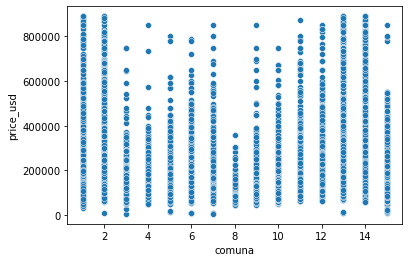

In [205]:
sns.scatterplot(data=new_df_caba,x='comuna', y='price_usd', palette='CMRmap')

#### Correlación de variables en el nuevo dataset

In [206]:
new_df_caba.corr(method='pearson')

,price_usd,surface_total,surface_covered,expenses,comuna,property_type_apartment,property_type_house,cantidad_delitos_por_comuna
price_usd,1.000000,0.029289,0.031936,0.628427,0.067956,0.011629,-0.011629,0.027826
surface_total,0.029289,1.000000,0.997735,0.000170,-0.000576,-0.000877,0.000877,0.004019
surface_covered,0.031936,0.997735,1.000000,0.003308,-0.001819,-0.001782,0.001782,0.004525
expenses,0.628427,0.000170,0.003308,1.000000,-0.000672,0.008857,-0.008857,0.096201
comuna,0.067956,-0.000576,-0.001819,-0.000672,1.000000,-0.012167,0.012167,-0.221730
property_type_apartment,0.011629,-0.000877,-0.001782,0.008857,-0.012167,1.000000,-1.000000,0.011628
property_type_house,-0.011629,0.000877,0.001782,-0.008857,0.012167,-1.000000,1.000000,-0.011628
cantidad_delitos_por_comuna,0.027826,0.004019,0.004525,0.096201,-0.221730,0.011628,-0.011628,1.000000


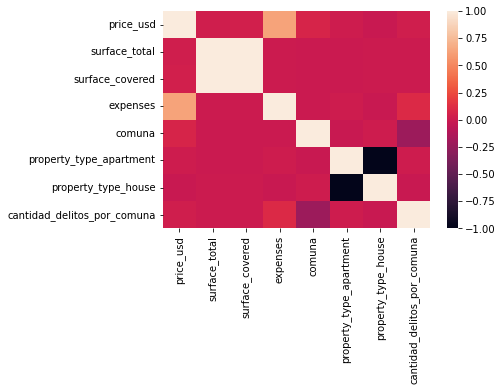

In [207]:
sns.heatmap(new_df_caba.corr(method='pearson'))
plt.show()

La variable **cantidad_delitos_por_comuna** tiene una correlación baja con el precio de las propiedades. 
Vamos a predecir el valor de las propiedades, con el modelo **LinearRegression**, que es el que arrojó menor error cuadrático medio.

#### RandomForestRegression

##### Definimos X e Y

In [208]:
col_finales=['price_usd', 'surface_total', 'surface_covered', 'expenses', 'comuna',
       'property_type_apartment', 'property_type_house',
       'cantidad_delitos_por_comuna']

In [209]:
X=new_df_caba.drop('price_usd', axis=1)

In [210]:
y=new_df_caba['price_usd']

##### Escalamos los datos (X)

In [211]:
min_max = MinMaxScaler()
X=min_max.fit_transform(X)
X

array([[8.09787010e-04, 9.93339956e-04, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 2.16534009e-01],
       [1.16304980e-03, 1.06000707e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 5.53545586e-02],
       [2.47283953e-03, 2.74001827e-03, 0.00000000e+00, ...,
        0.00000000e+00, 1.00000000e+00, 1.42547033e-01],
       ...,
       [1.19565867e-04, 1.46667644e-04, 4.50392485e-02, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [1.68479177e-04, 2.06668044e-04, 5.14734268e-02, ...,
        1.00000000e+00, 0.00000000e+00, 6.62083936e-01],
       [3.02175555e-03, 2.49334996e-03, 8.36443186e-01, ...,
        1.00000000e+00, 0.00000000e+00, 6.99348770e-01]])

In [212]:
# Transformamos X en un dataframe
X= pd.DataFrame(X, columns= col_finales[1:])

In [213]:
X.head(2)

,surface_total,surface_covered,expenses,comuna,property_type_apartment,property_type_house,cantidad_delitos_por_comuna
0,0.000810,0.000993,0.0,1.000000,0.0,1.0,0.216534
1,0.001163,0.001060,0.0,0.642857,0.0,1.0,0.055355


##### Separamos el conjunto de datos en Train y Test, quedándonos con un 30% para medir la performance de los modelos

In [214]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [215]:
# Revisamos el tamaño de cada muestra
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7033, 7), (3015, 7), (7033,), (3015,))

In [216]:
rf_reg=RandomForestRegressor(random_state=0, n_estimators=10)

In [217]:
rf2 = rf_reg.fit(X_train, y_train)

##### Predecimos y Evaluamos

In [218]:
y_train_pred = rf2.predict(X_train)
y_test_pred = rf2.predict(X_test)

In [219]:
# Probamos pocas instancias
muestra_datos=X_test.iloc[ :4]
rf2.predict(muestra_datos)

array([310241.66666667, 189757.6       , 224899.9       , 135000.        ])

In [220]:
# Comparamos con los valores reales
list(y_test.iloc[ :4])

[270000, 183000, 162000, 120000]

In [221]:
# Calculamos el error cuadrático medio
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(train_error)
print(test_error)

804399157.1446288
4914302612.283564


In [222]:
# Error absoluto máximo
max_error(y_test, y_test_pred)

450606.0

##### Crossvalidation

In [223]:
# Evaluamos el modelo usando crossvalidation
rf_scores2=cross_val_score(rf2, X,y,
                             scoring='neg_mean_squared_error',cv=10)
rf_scores2

array([-6.95659762e+09, -7.61759363e+09, -3.62878566e+09, -3.98941560e+09,
       -3.54614759e+09, -3.92271639e+09, -4.11022164e+09, -4.17787808e+09,
       -3.43317017e+09, -3.97518460e+09])

In [224]:
# Cambiamos el signo y sacamos la raiz
rf_rmse_Scores2=np.sqrt(-rf_scores2)
rf_rmse_Scores2

array([83406.22053455, 87278.82691582, 60239.40291279, 63161.82077683,
       59549.53898237, 62631.59257482, 64111.01031133, 64636.50736944,
       58593.26048516, 63049.06500664])

In [225]:
display_scores(rf_rmse_Scores2)

Scores: [83406.22053455 87278.82691582 60239.40291279 63161.82077683
 59549.53898237 62631.59257482 64111.01031133 64636.50736944
 58593.26048516 63049.06500664]
Mean: 66665.72458697332
Std: 9563.067780544063


##### Comparamos 20 casos

In [226]:
df_resultados2 = pd.DataFrame({
                                #'features':features,
                                'valor_real':y_test,
                                'valor_predicho': y_test_pred
                                })
df_resultados2.sort_values(by='valor_real', ascending=False, inplace=True)
df_resultados2.head(20).round(0)

,valor_real,valor_predicho
ID,,
1553,890000,890000.0
9147,890000,696000.0
3974,890000,861500.0
6089,890000,791800.0
2178,890000,890000.0
3499,890000,741000.0
4834,890000,657000.0
777,890000,618787.0
10267,890000,742000.0


**El desvición estandar del error cuadrático medio del modelo RandomForestRegression con el nuevo conjunto de datos, es menor, así como también el error absoluto máximo.**